# Third assignment for Applied Machine Learning 
## Greek Parliament Proceedings
>Stergios Sozos 8170129
>
>Department of Management Science and Technology
>
>Athens University of Economics and Business
>
>stergiossozos@outlook.com

***


### IMPORTANT
This assignment was created on a google colab notebook, and when it was downloaded as .ipynb some visualizations were lost. Thus in order to see the notebook without any losses you can see it directly on this link:
https://colab.research.google.com/drive/1CnQ9WFlaTgGi1872wxJAD_T6H9ApK7H4?usp=sharing

Before we start, we will import some libraries that we will need later, and set some options for pandas that we will need for displaying the data.

In [ ]:
#If this is done through google colab we need to run this command, restart kernel and then run all, because the kernel needs a restart to see the imported library.
%%python -m spacy download el_core_news_sm
import spacy

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats
import re as re
import spacy

%matplotlib inline

import matplotlib

from collections import defaultdict
matplotlib.style.use('ggplot')

#Options if we want to change the output
#Remove Hashtags below to see all columns of a dataframe and print numbers in float format

#pd.set_option("display.max_columns", None)
#pd.set_option('float_format', '{:f}'.format)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Important information!
In order to read the files needed for the assignment, we need to download them and move them to the appropriate path.

For this assignment we will use google colab which gives us more RAM and better GPU. In order not to upload the same big file again and again, we will upload it to google drive once, and then we will use it through drive. Our drive will be our path for this assignment

When we run the next cell it will provide a link. We need to click on this link, connect to our gmail, and then follow the steps (allow access). When we do that, we will be given a password. This password will be used on the next cell, where we will have a field to fill.
We insert the password and press enter. Then the message "mounted at /content/gdrive" will appear.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Note: If we want to use our own machine we need to move the file to the same path where the notebook is saved, and run the following command: 
>parliament = pd.read_csv("Greek_Parliament_Proceedings_1989_2019.csv")

### We are now ready to read our file

In [ ]:
parliament = pd.read_csv("/content/gdrive/My Drive/Greek_Parliament_Proceedings_1989_2019.csv")
parliament

member_name  ...                                             speech
0        κρητικος νικολαου παναγιωτης  ...   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1        κρητικος νικολαου παναγιωτης  ...   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2        κρητικος νικολαου παναγιωτης  ...   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...
3                                 NaN  ...                                  Μάλιστα, μάλιστα.
4        κρητικος νικολαου παναγιωτης  ...   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...
...                               ...  ...                                                ...
1194402   συντυχακης δανιηλ εμμανουηλ  ...   Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ...
1194403     κακλαμανης μιχαηλ νικητας  ...             Ορίστε, κύριε Υπουργέ, έχετε τον λόγο.
1194404     κακλαμανης μιχαηλ νικητας  ...   Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ...
1194405                           NaN  ...                                  Μάλιστα, μάλιστα.
1194406     κακλαμανης μιχαηλ νικητας  ...   Με τη συναίνεση του Σώματος και ώρα 11.25΄ λύ...

[1194407 rows x 8 columns]

## Cleaning
Before visuallising and exploring thoroughly our data, we will do a cleaning. 

Starting with the period column, we can see that there are 2 ways the periods are written. One containing only the period number, and one containing both number and the text "presided parliamentary republic". Let's have a look at all the unique values in period column.

In [ ]:
parliament.parliamentary_period.unique()

array(['period 5', 'period 6', 'period 7', 'period 8',
       'period 9 presided parliamentary republic',
       'period 10 presided parliamentary republic',
       'period 11 presided parliamentary republic',
       'period 12 presided parliamentary republic',
       'period 13 presided parliamentary republic',
       'period 14 presided parliamentary republic',
       'period 15 presided parliamentary republic',
       'period 16 presided parliamentary republic',
       'period 17 presided parliamentary republic'], dtype=object)

We see that after period 8, all periods are followed by the phrase "presided parliamentary republic" (Greek translation is "ΠΡΟΕΔΡΕΥΟΜΕΝΗΣ ΚΟΙΝΟΒΟΥΛΕΥΤΙΚΗΣ ΔΗΜΟΚΡΑΤΙΑΣ") 
We will keep only the period number from our analysis, as the  presided parliamentary republic is true in all periods, and the word period is not needed as the column itself is named period.


In [ ]:
# function to keep only the number
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
# apply function on parliamentary period column
parliament['parliamentary_period']=parliament['parliamentary_period'].apply(lambda x: find_number(x))
# Visualize result
parliament.head(5)

member_name  ...                                             speech
0  κρητικος νικολαου παναγιωτης  ...   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1  κρητικος νικολαου παναγιωτης  ...   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2  κρητικος νικολαου παναγιωτης  ...   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...
3                           NaN  ...                                  Μάλιστα, μάλιστα.
4  κρητικος νικολαου παναγιωτης  ...   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...

[5 rows x 8 columns]

We will now check the unique values for the other columns to check for mistakes

In [ ]:
parliament.political_party.unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'βουλη', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'αντιπολιτευση', 'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες - πανος καμμενος',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων'], dtype=object)

Even though there are some parties written in a more strange way (for example "Ανεξάρτητοι Έλληνες" is written as 'ανεξαρτητοι ελληνες - πανος καμμενος' which is the same but contains the name of the leader too) there are not duplicate parties written in different ways. We will also accept "ΒΟΥΛΗ" as a political party, as the dataset considers it as one. However there are nan values, which are going to be removed. We will see how many of these are nan to check if this will affect our analysis.

In [ ]:
parliament.political_party.isna().sum()

162

Only 162 rows are nan thus we keep all the other rows except from these.

In [ ]:
parliament = parliament[parliament['political_party'].notnull()]
parliament.head(5)

member_name  ...                                             speech
0  κρητικος νικολαου παναγιωτης  ...   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1  κρητικος νικολαου παναγιωτης  ...   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2  κρητικος νικολαου παναγιωτης  ...   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...
3                           NaN  ...                                  Μάλιστα, μάλιστα.
4  κρητικος νικολαου παναγιωτης  ...   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...

[5 rows x 8 columns]

## Visualization
We will now proceed to the explaration of our dataset through diagrams to get a better idea on what we are dealing with, or what cleaning we might have overseen.


### Speeches per party
We will create a bar chart where we will have all parties on the x axis and the number of speaches on the y axis.
We will first create our dataset for this plot by grouping by party and counting the speeches. We will then insert the data into the plot.

In [ ]:
# Create data by grouping
spPerParty = parliament.groupby(['political_party']).speech.agg('count').to_frame('total_speeches').sort_values(by=['total_speeches'], ascending=False ).reset_index()
spPerParty.head(5)

political_party  total_speeches
0                       νεα δημοκρατια          385634
1       πανελληνιο σοσιαλιστικο κινημα          377680
2  συνασπισμος ριζοσπαστικης αριστερας          126572
3          κομμουνιστικο κομμα ελλαδας           78631
4                                βουλη           45876

We can already see that the top 5, but we can visualise them in a plot and color them starting with darker colors for the highest values, moving to the lighter colors for the lowest values.



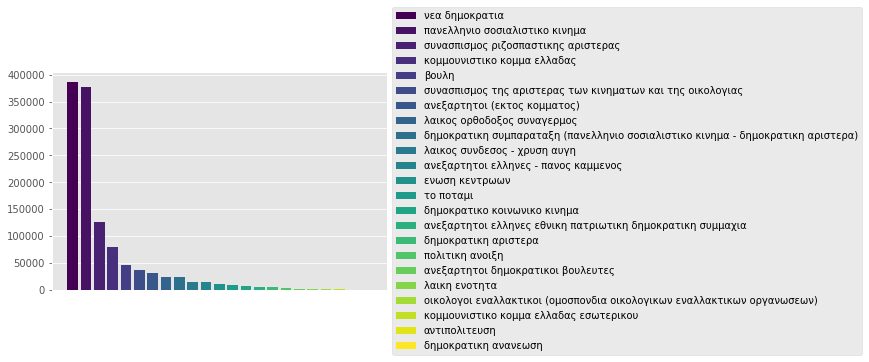

In [ ]:
# Speeches per party graph
fig, ax = plt.subplots()
yAxis = spPerParty["total_speeches"]
xAxis = spPerParty["political_party"]
# Set colors
cmap = plt.get_cmap('viridis')
my_colors =cmap(np.linspace(0, 1, len(xAxis)))
# Our labels are the values of the x axis, meaning the political parties
lab= xAxis
i=0
for x,y,c,lb in zip(xAxis,yAxis,my_colors,lab):
    ax.bar(x, y, color=c,label=lab[i])
    i+=1
ax.axes.get_xaxis().set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The highest values could be coming from either the party being for multiple years in the parliament, or having many members in the parliament, or being in the parliament in years where a lot of conversations took place, or beacause of having very talkative members

We can check some of these cases, by investigating ...
### Number of Speeches over time
... and then going deeper in speeches per party over time.

In [ ]:
# turn type into datetime
parliament['sitting_date'] = pd.to_datetime(parliament['sitting_date'], errors='coerce')
# Create data by grouping
spPertime = parliament.groupby(['sitting_date']).speech.agg('count').to_frame('total_speeches').sort_values(by=['sitting_date'], ascending=True ).reset_index()
# Visualize results
spPertime

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


sitting_date  total_speeches
0      1989-07-03               5
1      1989-07-04               7
2      1989-07-05              50
3      1989-07-06              32
4      1989-07-07             359
...           ...             ...
4773   2019-02-18               5
4774   2019-02-19             210
4775   2019-02-20             239
4776   2019-02-21             387
4777   2019-02-22              65

[4778 rows x 2 columns]

We can now plot the results using plotly express

In [ ]:
# Using plotly.express
import plotly.express as px
# use data from spPertime and plot
fig = px.line(spPertime, x='sitting_date', y="total_speeches")
fig.show()

Even though the plot is too crowded we can spot some very obvious peaks. These peaks will probably represent an important situation in Greece, which needed a lot of discussion. For example the highest point overall is on January 2018. This was when the conversations for the "Macedonian" dispute name, which is a problem that lasted for 30 years. It was also the time when protests against this descision were taking place in Greece. Also, if we search on events of january 2018 in Greece we will find out that a "Polinomosxedio" was introduced, meaning it was some descisions coming from multiple ministries. 
In this way we can find the most "discussed" events in the parliament.

However, we might be interested in more specific time stamps, for example which were the most discussed events per decade. We can find that by requesting year, month or day. We will show the example per decade but simillary we can limit to specific years,months, or even days. We will create columns represnting each decade. the value will be true if the correspinding sitting date is the one we need, or false if not. 

In [ ]:
# split into decades by creating columns that have true or false if the decade of the column is the one in the sitting date column 
spPertime['y90'] = spPertime["sitting_date"].dt.year<2000
spPertime['y10'] = spPertime["sitting_date"].dt.year>2010
# ~ symbol stands for not operator in pandas
spPertime['y00'] = ~(spPertime['y10'] | spPertime['y90'])
# create dataframe based on the columns created, only if their value is true
time90 = spPertime[spPertime.y90]
time00 = spPertime[spPertime.y00]
time10 = spPertime[spPertime.y10]

### Number of Speeches per time for 90s


In [ ]:
# plot 90s speeches over time
fig = px.line(time90, x='sitting_date', y="total_speeches")
fig.show()

Correspondigly we can use time00 and time10 dataframe to depict the other 2 decades. For depicting specific years months or days, we just change th attribute "year" to "month" or "day" and the operator "<" to  "==", and repeat the steps.

### Number of Speeches per party over time

We can now visualise the number of speeches per party over time.

In [ ]:
# Create data by grouping
spPerPartyPertime = parliament.groupby(['political_party',"sitting_date"]).speech.agg('count').to_frame('total_speeches').reset_index()
# Visualize results
spPerPartyPertime

political_party sitting_date  total_speeches
0      ανεξαρτητοι (εκτος κομματος)   1990-01-09               2
1      ανεξαρτητοι (εκτος κομματος)   1990-01-12               2
2      ανεξαρτητοι (εκτος κομματος)   1990-01-18               3
3      ανεξαρτητοι (εκτος κομματος)   1990-01-19               5
4      ανεξαρτητοι (εκτος κομματος)   1990-01-24               6
...                             ...          ...             ...
29077                     το ποταμι   2019-01-29               1
29078                     το ποταμι   2019-02-08               9
29079                     το ποταμι   2019-02-12               2
29080                     το ποταμι   2019-02-13               1
29081                     το ποταμι   2019-02-15               7

[29082 rows x 3 columns]

In [ ]:
# Plotly figure 1
fig = px.line(spPerPartyPertime, x='sitting_date', y='total_speeches',
              color="political_party",
              line_group="political_party", hover_name="political_party", color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_layout(title='Political parties speeches over time')

Even though the colors could make the leaders of each party have a heart attack (as each party has its own representative color, i.e. Potami is supposed to be green, but here it's pink) the plot gives a lot of important information.

If we see the legend, or if we move our cursor to each color, we will see the evolution of political parties over time. For example, for more than a decade we see that cyan is super strong (cyan represents "PASOK") but after 2011 it's almost wiped out. We can also see the rise of "SIRIZA" (represented with purple.

As the diagram is a little populated, and only big parties can be distingushed we have 2 options. One is to double click on specific parties on the legend, getting the speeches over time only for these parties. The other option is to filter our dataframe "spPerPartyPertime" and keep only the parties we need, then plot it again. If we did the second option, we could also pick more meaningful colors, with a command like:
```
color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"]
```
Note: Choosing alphabet as our palette for this plot is important, as if we had left the default option only 5 colors would be present, thus all parties would have the same color with at least one other party. We can choose a pallete by writing :
```
fig = px.colors.qualitative.swatches()```
fig.show()
 ```
 and picking a pallete of our preference.

### Speakers per party
We can also investigate who are the most "talkative" persons in each party. We will group our data per party, but now we will also group them by speaker too, by counting the speeches for each speaker separately. Thus we won't get just list of the speakers, but their bar (on a bar chart) will be higher depending on their total speeches. We should note ,though, that if a person from the same party has been elected for more than 2 times, he would probably have more speeches than another who was elected only once. Thus it's not actually the most "talkative" but we can simplify it with this expression.


In [ ]:
# Create data by grouping
speakerPerParty = parliament.groupby(['political_party',"member_name"]).speech.agg('count').to_frame('total_speeches').reset_index()
speakerPerParty

political_party  ... total_speeches
0     ανεξαρτητοι (εκτος κομματος)  ...              2
1     ανεξαρτητοι (εκτος κομματος)  ...             34
2     ανεξαρτητοι (εκτος κομματος)  ...             34
3     ανεξαρτητοι (εκτος κομματος)  ...             18
4     ανεξαρτητοι (εκτος κομματος)  ...            240
...                            ...  ...            ...
1508                     το ποταμι  ...             49
1509                     το ποταμι  ...             79
1510                     το ποταμι  ...             30
1511                     το ποταμι  ...             19
1512                     το ποταμι  ...            333

[1513 rows x 3 columns]

We can now display the top person per politcal party, by grouping by party and keeping the top member. We then sort the values in a descending order so that we will have the top of the tops first, and so on. Finally, we connect the columns political party and member name so that we will have a string with the party and the person who is the top member.

In [ ]:
topSpeakers = speakerPerParty.groupby('political_party', as_index=False).max()
topSpeakers["Party_and_Name"] = topSpeakers["political_party"] + topSpeakers["member_name"]
topSpeakers = topSpeakers[["Party_and_Name","total_speeches"]]
topSpeakers = topSpeakers.sort_values(by=['total_speeches'], ascending=False )
topSpeakers.head(5)

Party_and_Name  total_speeches
16  πανελληνιο σοσιαλιστικο κινημαχωρεμης ιωαννη α...           35338
14      νεα δημοκρατιαψωμιαδης χαραλαμπους παναγιωτης           28391
19  συνασπισμος της αριστερας των κινηματων και τη...           12158
18  συνασπισμος ριζοσπαστικης αριστεραςψυχογιος κω...           10666
9   κομμουνιστικο κομμα ελλαδαςχουρμουζιαδης χαραλ...            9873

Important note: Many members belong to multiple parties, thus the order of the grouping commands should not be changed. We first group by party and name , then by party, keeping the top member (marked as max here). If we wanted to see the most talkative persons overall we could just group by name our initial dataset "parliament" and count their speeches.

We are now ready to plot our top members per party on a bar chart:

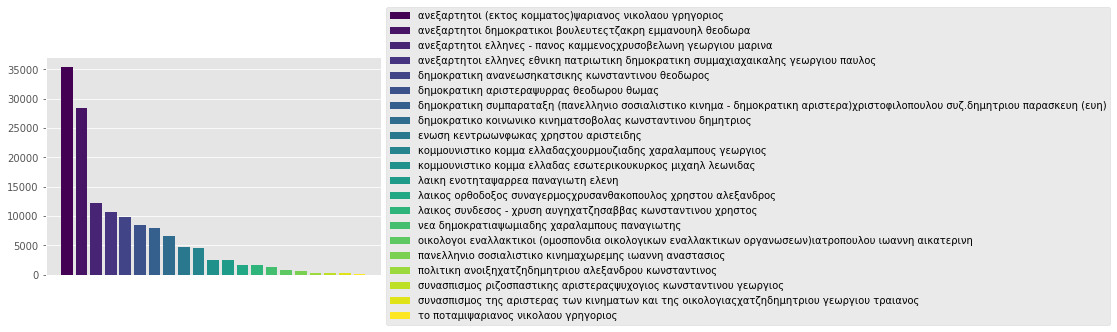

In [ ]:
fig, ax = plt.subplots()
yAxis = topSpeakers["total_speeches"]
xAxis = topSpeakers["Party_and_Name"]
# Set colors
cmap = plt.get_cmap('viridis')
my_colors =cmap(np.linspace(0, 1, len(xAxis)))
# Our labels are the values of the x axis, meaning the political parties
lab= xAxis
i=0
for x,y,c,lb in zip(xAxis,yAxis,my_colors,lab):
    ax.bar(x, y, color=c,label=lab[i])
    i+=1
ax.axes.get_xaxis().set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

We can also choose a specific party to see its top speakers based on their total speeches. We will examine that for Siriza

In [ ]:
# Keep siriza from speakerperparty
siriza = speakerPerParty.loc[speakerPerParty['political_party'] == "συνασπισμος ριζοσπαστικης αριστερας"]
siriza = siriza.sort_values(by=['total_speeches'], ascending=False ).reset_index() 
siriza = siriza[["member_name","total_speeches"]].head(17)
siriza

member_name  total_speeches
0               κουρακης στυλιανου αναστασιος (τασος)           10666
1                           δραγασακης ανδρεα ιωαννης            9150
2                        βαρεμενος βασιλειου γεωργιος            8294
3                       λαφαζανης γεωργιου παναγιωτης            7872
4                 χριστοδουλοπουλου ζαχαρια αναστασια            7728
5                              κωνσταντοπουλου ν. ζωη            6069
6                           βουτσης γεωργιου νικολαος            5956
7                          δριτσας παναγιωτη θεοδωρος            3678
8                       μητροπουλος παναγιωτη αλεξιος            2564
9                         λεβεντης σωτηριου αθανασιος            2514
10                παπαδημουλης χριστοδουλου δημητριος            2422
11               κοντονης νικολαου χαραλαμπος-σταυρος            2187
12                  κουρουμπλης ελευθεριου παναγιωτης            2054
13  αμμανατιδου-(πασχαλιδου) γεωργιου ευαγγελια (λ...            2000
14                      τσακαλωτος στεφανου ευκλειδης            1822
15                              πολακης πετρου παυλος            1767
16                             τσιπρας παυλου αλεξιος            1764

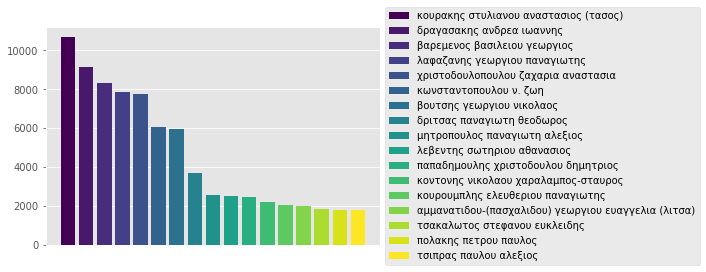

In [ ]:
fig, ax = plt.subplots()
yAxis = siriza["total_speeches"]
xAxis = siriza["member_name"]
# Set colors
cmap = plt.get_cmap('viridis')
my_colors =cmap(np.linspace(0, 1, len(xAxis)))
# Our labels are the values of the x axis, meaning the political parties
lab= xAxis
i=0
for x,y,c,lb in zip(xAxis,yAxis,my_colors,lab):
    ax.bar(x, y, color=c,label=lab[i])
    i+=1
ax.axes.get_xaxis().set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Switching Members
We can also try to find the members that have been through the most political parties (The members who have switched the most from a party to another)


In [ ]:
# Create data by grouping
switchers = parliament.groupby(['member_name']).political_party.agg('nunique').to_frame('total_switches').sort_values(by=['total_switches'], ascending=False ).reset_index()
switchers.head(15)

member_name  total_switches
0         νικολοπουλος ιωαννου νικολαος               5
1   κουβελης ευαγγελου φωτιος-φανουριος               4
2        ιατριδη ιωαννη τσαμπικα (μικα)               4
3              δημαρας νικολαου ιωαννης               4
4         οικονομου αθανασιου βασιλειος               4
5     μιχελογιαννακης δημητριου ιωαννης               4
6                    αχμετ σαμπρη ιλχαν               4
7            κουντουρα αλεξανδρου ελενα               4
8     βουδουρης γεωργιου οδυσσευς-νικος               4
9             λοβερδος νικολαου ανδρεας               4
10          μαρκου δημοσθενη αικατερινη               4
11     κολλια-τσαρουχα ευστρατιου μαρια               4
12     καμμενος ηλια παναγιωτης (πανος)               4
13          ψαριανος νικολαου γρηγοριος               4
14             τζακρη εμμανουηλ θεοδωρα               3

### Top members based on their identity
Finally, we can see who is talking the most based on id, for example, is he a president, is he a member of a party etc. This info can be found on speaker's info column. We will print the top 45.

In [ ]:
# Create data by grouping
spPerId= parliament.groupby(['speaker_info']).speech.agg('count').to_frame('total_speeches').sort_values(by=['total_speeches'], ascending=False ).reset_index()
spPerId.head(40)

speaker_info  total_speeches
0                                          προεδρευων          354549
1                                            προεδρος           58039
2                                        βουλευτης/ες           47165
3                              υφυπουργος οικονομικων            7201
4                                υπουργος δικαιοσυνης            5882
5        υφυπουργος εθνικης παιδειας και θρησκευματων            4367
6                                υφυπουργος αναπτυξης            3736
7                                   υπουργος γεωργιας            3707
8                                 υπουργος εσωτερικων            3370
9                                 υφυπουργος γεωργιας            3361
10  υφυπουργος εσωτερικων, δημοσιας διοικησης και ...            3251
11                       υπουργος εμπορικης ναυτιλιας            3231
12  υπουργος δικαιοσυνης, διαφανειας και ανθρωπινω...            3077
13       υφυπουργος υγειας και κοινωνικης αλληλεγγυης            2993
14              υφυπουργος οικονομιας και οικονομικων            2991
15                                υπουργος πολιτισμου            2957
16         υπουργος εθνικης παιδειας και θρησκευματων            2931
17                            υπουργος δημοσιας ταξης            2869
18                                 υπουργος αναπτυξης            2805
19                υπουργος μεταφορων και επικοινωνιων            2769
20                              υφυπουργος πολιτισμου            2769
21                              υφυπουργος εξωτερικων            2750
22                            υπουργος εθνικης αμυνας            2728
23                      υφυπουργος εθνικης οικονομιας            2705
24                          ε αντιπροεδρος της βουλης            2684
25                            προεδρος της κυβερνησης            2634
26          υπουργος αγροτικης αναπτυξης και τροφιμων            2523
27  υπουργος εσωτερικων, δημοσιας διοικησης και απ...            2501
28         υπουργος υγειας και κοινωνικης αλληλεγγυης            2342
29                                    υπουργος υγειας            2329
30                     υφυπουργος υγειας και προνοιας            2324
31                               υπουργος οικονομικων            2312
32                  υπουργος προεδριας της κυβερνησης            2289
33  υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...            2289
34                      προεδρος της νεας δημοκρατιας            2274
35  υπουργος περιβαλλοντος, χωροταξιας και δημοσιω...            2269
36   υφυπουργος απασχολησης και κοινωνικης προστασιας            2231
37                        αναπληρωτης υπουργος υγειας            2188
38  υφυπουργος περιβαλλοντος, χωροταξιας και δημοσ...            2093
39      υφυπουργος εργασιας και κοινωνικων ασφαλισεων            2082

We observe that there are a lot of mistakes, either because of different spelling or because of different naming (for example we have both υπουργός Υγείας and Υπουργός υγείας και Πρόνοιας). However, this is not affecting our interpretation, as the top 3 ids are clearly distinguished from the rest, and won't change. After the top 3 we have almost 40 ids that have values between 2.000 and 7.000

We can also spot a lot of mispellings at the end of this dataframe, as for an id to appear only once,it means that probably its wrongly written. Let's have a look.

In [ ]:
# see full text on columns (as text here is more than the default 50, and less than 100)
pd.options.display.max_colwidth = 100
# show last 10 elements
spPerId.tail(10)

speaker_info  total_speeches
1261                                              υπουργος εθνικης οικονομιας και οικονο-σελιδα 1113μικων               1
1262                                              υπουργος εθνικης οικονομιας και οικονο-σελιδα 2644μικων               1
1263                                                           υπουργος εθνικης οικονομιας και οικονομιας               1
1264  υπουργος εθνικης οικονομιας και οικονομικων για τους εργαζομενους. δημητριος κωστοπουλος δεν ειν...               1
1265                                                           υπουργος εθνικης οικονομιας και οικονομιων               1
1266                                               υπουργος εθνικης οικονομιας και οικονοσελιδα 2478μικων               1
1267                                              υπουργος εθνικης οικονομιας και σελιδα 3793 οικονομικων               1
1268                                              υπουργος εθνικης οικονομιας και σελιδα 4055 οικονομικων               1
1269                    υπουργος εθνικης οικονομιας να απαντησω και επ αυτου;προεδρευων νικολαος κατσαρος               1
1270                                                                      υφυφπουργος υγειας και προνοιας               1

If we needed to do some cleaning on this column, without looking one by one, we could wipe out all the rows that have 1 total speach in this dataframe. However our main puropse is to classify speeches to their corresponding party, thus we are not affected by this column, and we won't remove a row because the speaker's info is wrongly written.

### Total Sessions per period 
We can also check which session had the most periods, regardless of the sittings.

In [ ]:
# Create data by grouping
sessionperperiod= parliament.groupby(['parliamentary_period']).parliamentary_session.agg('nunique').to_frame('total_sessions').sort_values(by=['total_sessions'], ascending=False ).reset_index()
sessionperperiod.head(5)

parliamentary_period  total_sessions
0                    7              11
1                   10               9
2                   15               9
3                   11               7
4                   17               7

### Total Sittings per sesssions per period 
We can do the same procedure but now with how many sittings a session had, per period. We will then sort them based on the sittings per session, and then we can assume that there were many conversations going on at the time with the most sittings per period.

In [ ]:
# Create data by grouping
sittingpersessionperperiod= parliament.groupby(['parliamentary_period',"parliamentary_session"]).parliamentary_sitting.agg('nunique').to_frame('total_sittings').sort_values(by=['total_sittings'], ascending=False ).reset_index()
sittingpersessionperperiod

parliamentary_period  ... total_sittings
0                    17  ...            201
1                    15  ...            200
2                    13  ...            199
3                    11  ...            194
4                    17  ...            185
..                  ...  ...            ...
61                   15  ...              7
62                    7  ...              6
63                   14  ...              3
64                   17  ...              1
65                    9  ...              1

[66 rows x 3 columns]

## Classification
After exploring our dataset we can now proceed with our main goal which is to train at least two non-neural network algorithms in order to learn to classify a speech. The target variable will be the political party of the speaker.

An overview of the classification:
* We will create a dummy classifier to have a baseline to compare
* We will use different models, and print their reports and their confusion matrix to compare them and evaluate them
* We will try to improve the performance of the models by:
* Pre-proccess our speeches and re-run the algorithms 
* Tuning the parameters of the algorithms to get better results 

The first and early step of this training is to check how many speeches each party has, as if we see later on that a party cannot be guessed it might be due to small number of speeches. We already have the table from visualization so we will print its tail and keep it in mind.

In [ ]:
spPerParty.tail(5)

political_party  total_speeches
18                                                            λαικη ενοτητα             346
19  οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)             307
20                                   κομμουνιστικο κομμα ελλαδας εσωτερικου             202
21                                                            αντιπολιτευση              11
22                                                     δημοκρατικη ανανεωση               6

We see that "αντιπολιτευση" and "δημοκρατικη ανανεωση" have almost none speeches, thus we will remove them now. If the number was a little bigger we could leave it as it is and check the results, but with 6 and 11 elements it's not worth it.

In [ ]:
parliament = parliament[parliament.political_party != "αντιπολιτευση"]
parliament = parliament[parliament.political_party != "δημοκρατικη ανανεωση"]

From the parliament dataset we will keep only the columns needed, which are the speeches and the political parties.

In [ ]:
#keep only the columns needed
classifyparliament = parliament[["political_party","speech"]]
classifyparliament.reset_index(drop=True, inplace=True)
classifyparliament

political_party                                                                                               speech
0        πανελληνιο σοσιαλιστικο κινημα   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να συνοδεύσει το Μακαριότατο Αρχιεπίσκοπο Αθηνών και π...
1        πανελληνιο σοσιαλιστικο κινημα   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσει την Ιερά Σύνοδο εκτός της Αιθούσης της Βουλής.  ...
2        πανελληνιο σοσιαλιστικο κινημα   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσιοδοτήσει το Προεδρείο για την επικύρωση των Πρακτ...
3                                 βουλη                                                                                    Μάλιστα, μάλιστα.
4        πανελληνιο σοσιαλιστικο κινημα   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Με τη συναίνεση της Βουλής και ώρα 10.27` λύεται η ...
...                                 ...                                                                                                  ...
1194223     κομμουνιστικο κομμα ελλαδας   Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήταν κάτι το αναπάντεχο, ούτε ήταν αποτέλεσμα μόνο τ...
1194224                  νεα δημοκρατια                                                               Ορίστε, κύριε Υπουργέ, έχετε τον λόγο.
1194225                  νεα δημοκρατια   Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, να δίνει τα χρήματα που προβλέπει το Σύνταγμα και ...
1194226                           βουλη                                                                                    Μάλιστα, μάλιστα.
1194227                  νεα δημοκρατια   Με τη συναίνεση του Σώματος και ώρα 11.25΄ λύεται η συνεδρίαση για ημέρα Δευτέρα 25 Φεβρουαρίου...

[1194228 rows x 2 columns]

We will now remove any nans in speeches as our classification can't work with nans

In [ ]:
classifyparliament = classifyparliament[classifyparliament['speech'].notnull()]

Our final pre-step is to split our dataset into training and testing, by getting 70% of the data for training and 30% for testing our model. We will use shuffle=True parameter to shuffle our data before spliting. Shuffling is important here, as for example we have seen that Nea dimokratia has risen in the last years, thus most of their speeches are in the last rows of the dataset. If we don't shuffle, little of nea dimokratia's speeches will end up on the training dataset.

In [ ]:
from sklearn.model_selection import train_test_split
X, y = (classifyparliament['speech'], 
        classifyparliament['political_party'])
# Split the dataset into a training and a testing set
# Test set will be the 30% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42,shuffle=True)

We are now ready to begin our classification. We will start with a very stupid but also very important method, known as the dummy classifier. For the dummy classifier, we will use the "most_frequent" which always predicts the most frequent class. We'll keep the results so we can compare them to the models we will build, as sometimes the majorities can be easily predicted (giving a high rate of success), but if minorities fail to be predcidted then even a dummy classifier could reach our results.

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.dummy import DummyClassifier


dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
y_dummy_pred = dummy_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_dummy_pred, 
                                    zero_division=1)) # silence warning

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       1.00      0.00      0.00      9035
                                             ανεξαρτητοι δημοκρατικοι βουλευτες       1.00      0.00      0.00       527
                                           ανεξαρτητοι ελληνες - πανος καμμενος       1.00      0.00      0.00      4185
                     ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       1.00      0.00      0.00      1654
                                                                          βουλη       1.00      0.00      0.00     13612
                                                           δημοκρατικη αριστερα       1.00      0.00      0.00      1227
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       1.00      0.00      0.00      6899
                               

Recall is the ratio of of true positives over all actual positives.  that is recall deals with False negatives 

Precision is the ratio of true positives over all reported positives. that is precision deals with False positives

The  𝐹1  score takes both the precision and the recall into account, thus we will compare this metric.

The support is the number of samples of the y_test dataset that lie in that class.

Low recall and high precision is very common. It just means that the classifier is very conservative - does not risk too much in saying that a sample is Positive (low recall), and thus when it does, it is very confident about it (high precision). Especially in our case, which is a dummy classifier we didn't expect something better.

As expected, the most frequent party (νεα δημοκρατια) has the best score in terms of f1. Also our accuracy is 32%. We can set this accuracy as our minimum goal. (However we are not interested only in accuracy, we will investigate all other metrics).

Before proceeding we will remove any party that has support less than 3.000 as it is a very low number of data to use.

In [ ]:
classifyparliament = classifyparliament[classifyparliament.political_party != "ανεξαρτητοι δημοκρατικοι βουλευτες"]
classifyparliament = classifyparliament[classifyparliament.political_party != "το ποταμι"]
classifyparliament = classifyparliament[classifyparliament.political_party != "πολιτικη ανοιξη"]
classifyparliament = classifyparliament[classifyparliament.political_party != "λαικη ενοτητα"]
classifyparliament = classifyparliament[classifyparliament.political_party != "κομμουνιστικο κομμα ελλαδας εσωτερικου"]
classifyparliament = classifyparliament[classifyparliament.political_party != "δημοκρατικη αριστερα"]
classifyparliament = classifyparliament[classifyparliament.political_party != "ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια"]
classifyparliament = classifyparliament[classifyparliament.political_party != "δημοκρατικο κοινωνικο κινημα"]
classifyparliament = classifyparliament[classifyparliament.political_party != "οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)"]

We will re-split our dataset as it has changed.

In [ ]:
from sklearn.model_selection import train_test_split
X, y = (classifyparliament['speech'], 
        classifyparliament['political_party'])
# Split the dataset into a training and a testing set
# Test set will be the 30% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42,shuffle=True)

### Multinomial Naive Bayes 
In order to build our model we will use some features such as bag of words, tfidf and Multinominal Naive Bayes, which is our classifier

We can build a pipeline so that we can chain all of them together. Let's explain these models first.

Bag-of-words: 
What we call words in the speeches are actually tokens in language processing parlance.

We need a mechanism to break our documents into tokens and count them.

**This is the job of CountVectorizer.**

Occurrence counts is simple and makes for a good start, but there are problems when we are dealing with large documents.

Terms in large documents will display higher counts than those of smaller documents, even if the documents talk about the same topics. So their count vectors will appear different, even for documents talking about the same thing.

Tf-idf: 
The tf metric stands for term frequency.
The idf metric stands for inverse document frequency.
After we calculate the tf-idf, we want to make sure that documents with similar content look indeed similar, even though one may be much longer than the other.

Since the similarity between two documents is represented by the tf-idf vectors for these document, we want to scale the vectors so that all documents have the magnitude, according to some norm.

**All these transformations are implemented by the TfidfTransformer class.**

Finally we will train our classifier to try to predict the political party of a speaker. The multinomial distribution means that the probability of each word is independent of the other words in the document.

**This is implemented by MultinomialNB**

To simplify the whole process we'll use **the Pipeline class**.
The construction of the Pipeline class takes a list of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object being an estimator.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clfm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
text_clfm.fit(X_train, y_train)
predicted = text_clfm.predict(X_test)
np.mean(predicted == y_test)

0.4719112377943382

#### Evaluation

We will print the same metrics as in the dummy classifier, but we will also see our confusion matrix.

Each cell $(i, j)$ in the confusion matrix contains the number of instances of class $i$ that were predicted to be in class $j$.
A good classifier will accumulate values on the diagonal.


We first print the classification report.

In [ ]:
print(metrics.classification_report(y_test, predicted,
                                    ))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.00      0.00      0.00      8793
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.00      0.00      0.00      4095
                                                                          βουλη       0.88      0.98      0.93     13723
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.00      0.00      0.00      6951
                                                                 ενωση κεντρωων       0.00      0.00      0.00      2924
                                                    κομμουνιστικο κομμα ελλαδας       0.39      0.25      0.31     23542
                                                    λαικος ορθοδοξος συναγερμος       1.00      0.00      0.00      7204
                               

We can see a warning about precision and F-score. This is not an error, just a warning that not all our labels are included in our y_pred, i.e. there are some labels in our y_test that our classifier never predicts.

We will now print the confusion matrix, which shows in the one axis the value that should be predicted and in the other axis what was predicted form our classifier. The ideal result is that the diagonial is the only one with values, and the rest cells with zero. However this would happen only on a 100% perfect classifier. Thus, we are pleased if we observe a tendency to the main diagonial, even though ther emight be other cells colored, too.

In [ ]:
conf_arr = metrics.confusion_matrix(y_test, predicted)

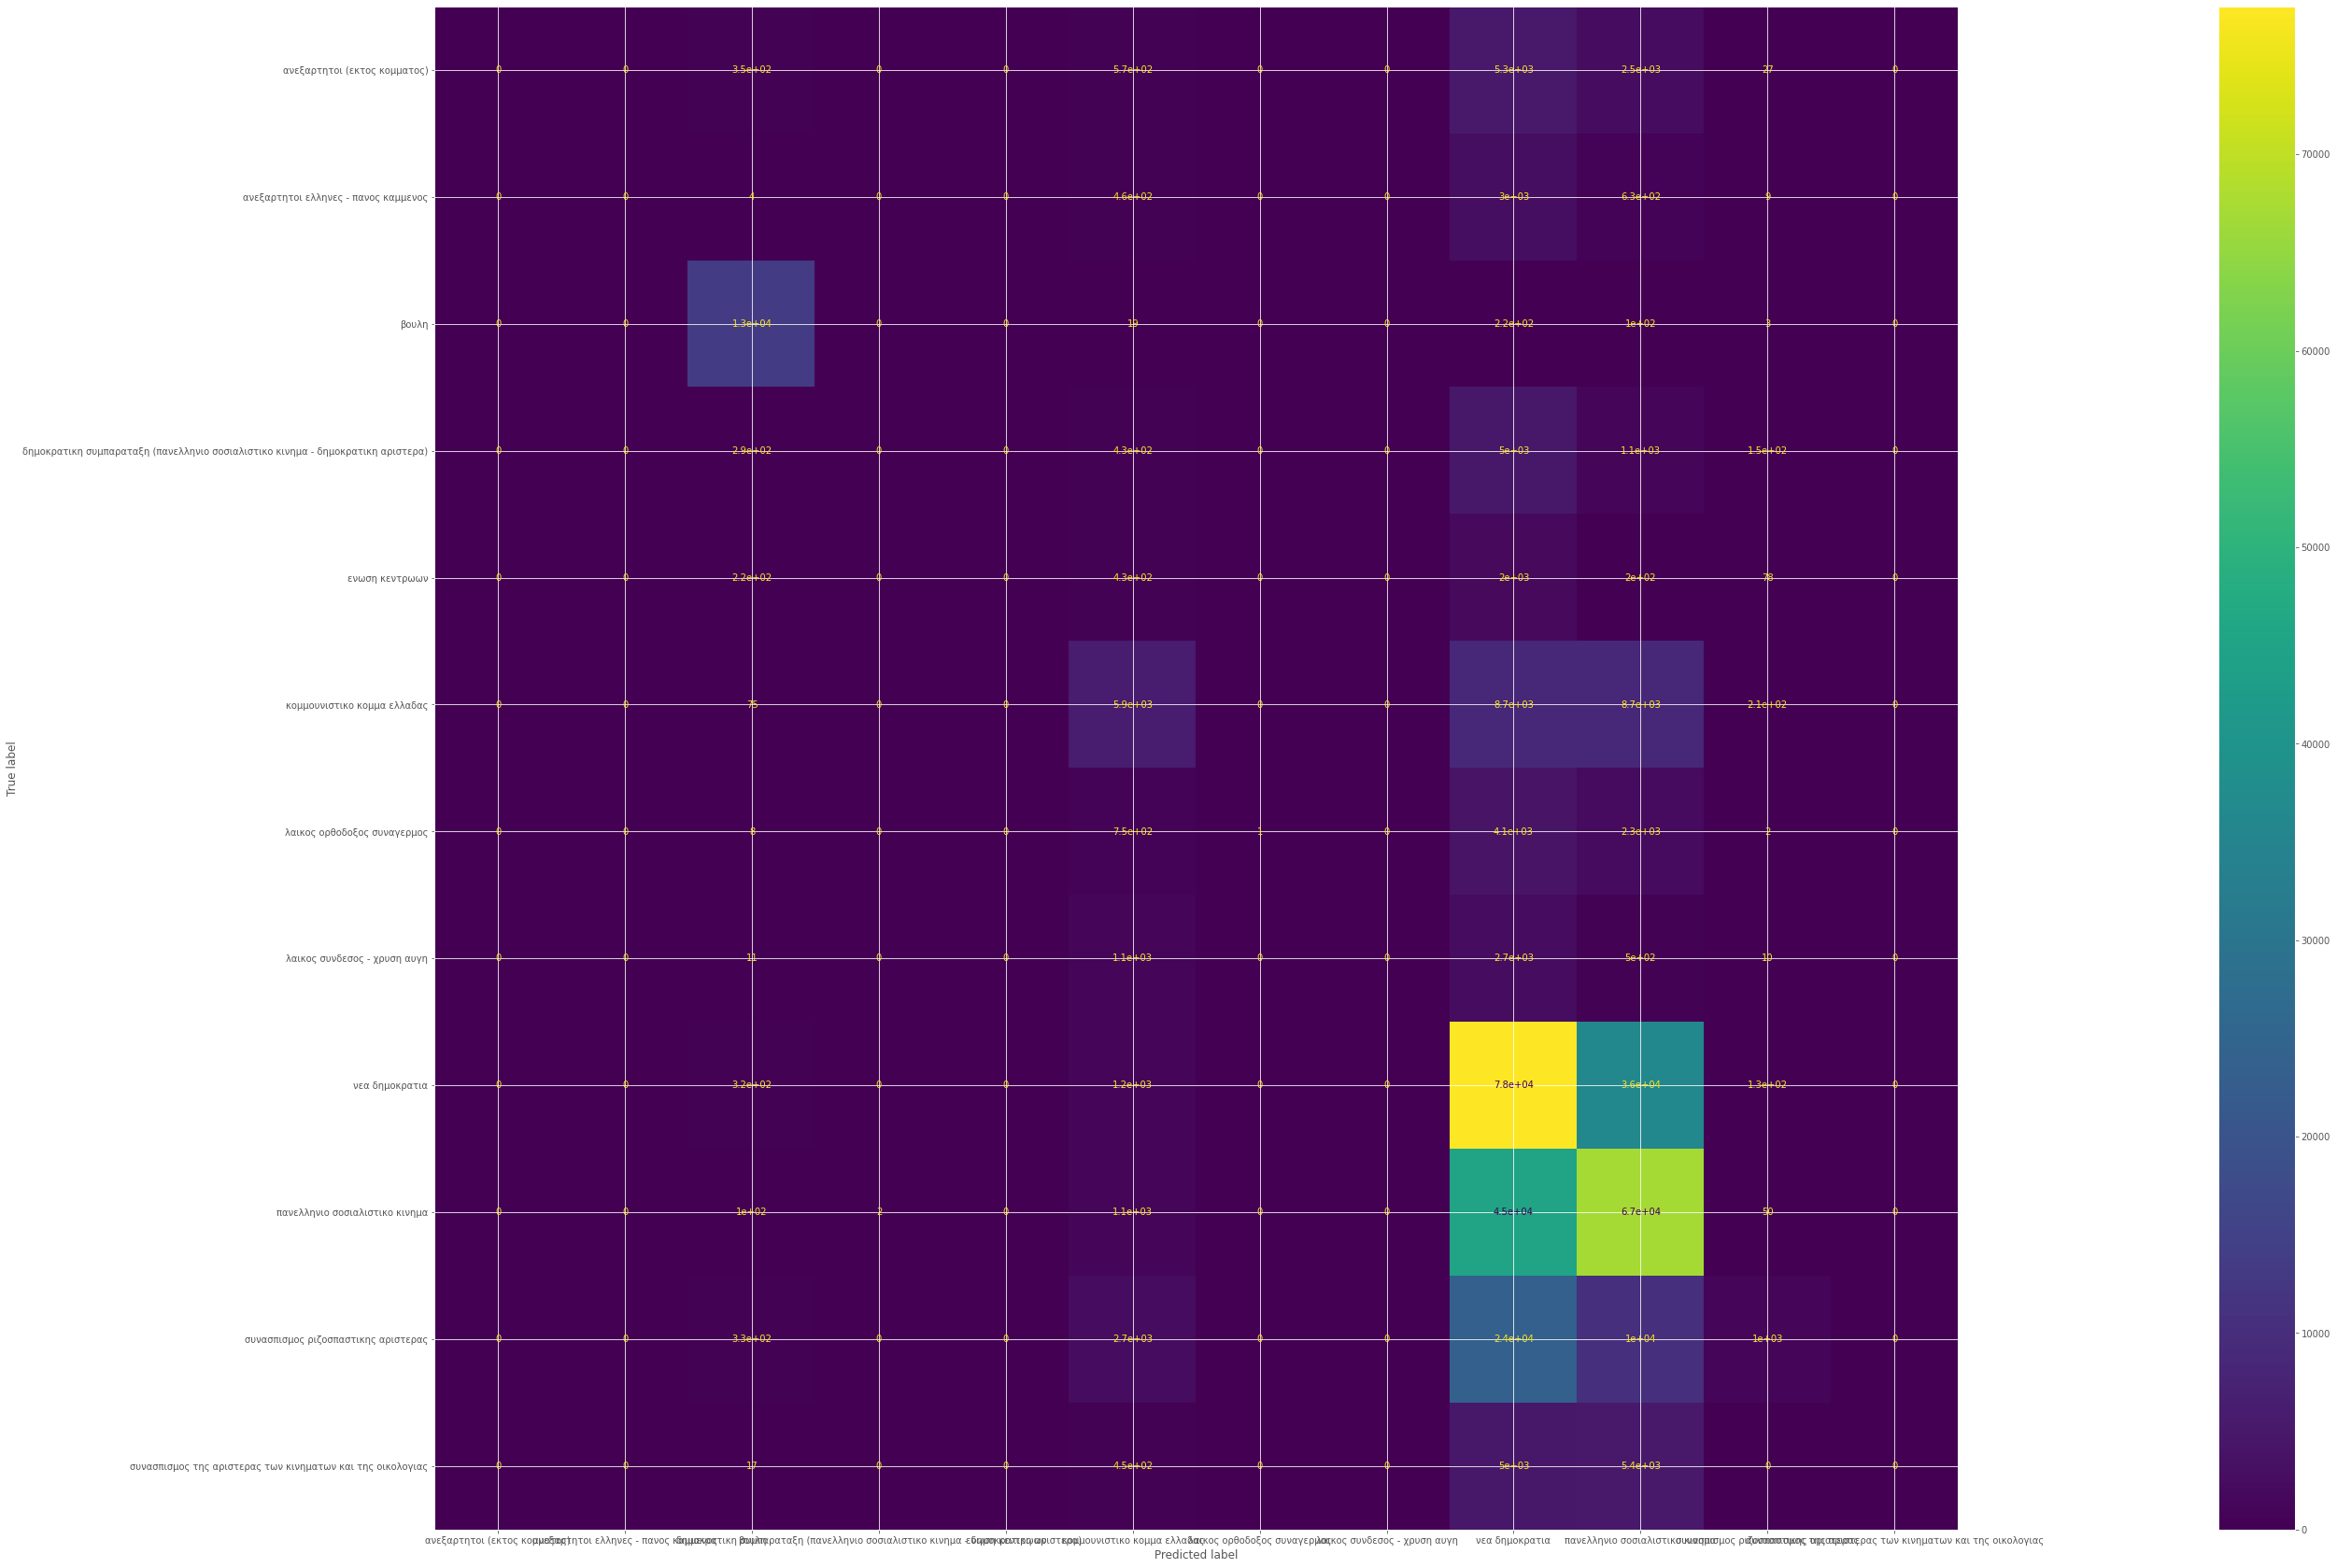

In [ ]:
fig, ax = plt.subplots(figsize=(100, 30))
metrics.plot_confusion_matrix(text_clfm, X_test, y_test, ax=ax)

### Stochastic Gradient Descent classifier
We will now try a different classifier and compare its results with the Naive Bayes classifier. The first steps will remain the same in the pipeline, so we will only change the classifier we are using.

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clfs = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(alpha=1e-3,
                                           random_state=42))
                    ])
text_clfs.fit(X_train, y_train)
predicted = text_clfs.predict(X_test)
np.mean(predicted == y_test)   

0.46838833751159037

Let's print our classification report

In [ ]:
print(metrics.classification_report(y_test, predicted,
                                    ))

                                                                                 precision    recall  f1-score   support

                                                   ανεξαρτητοι (εκτος κομματος)       0.09      0.19      0.12      8793
                                           ανεξαρτητοι ελληνες - πανος καμμενος       0.13      0.03      0.04      4095
                                                                          βουλη       0.77      0.98      0.86     13723
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)       0.23      0.08      0.12      6951
                                                                 ενωση κεντρωων       0.26      0.06      0.09      2924
                                                    κομμουνιστικο κομμα ελλαδας       0.39      0.20      0.27     23542
                                                    λαικος ορθοδοξος συναγερμος       0.18      0.09      0.12      7204
                               

We can also plot our confusion matrix.

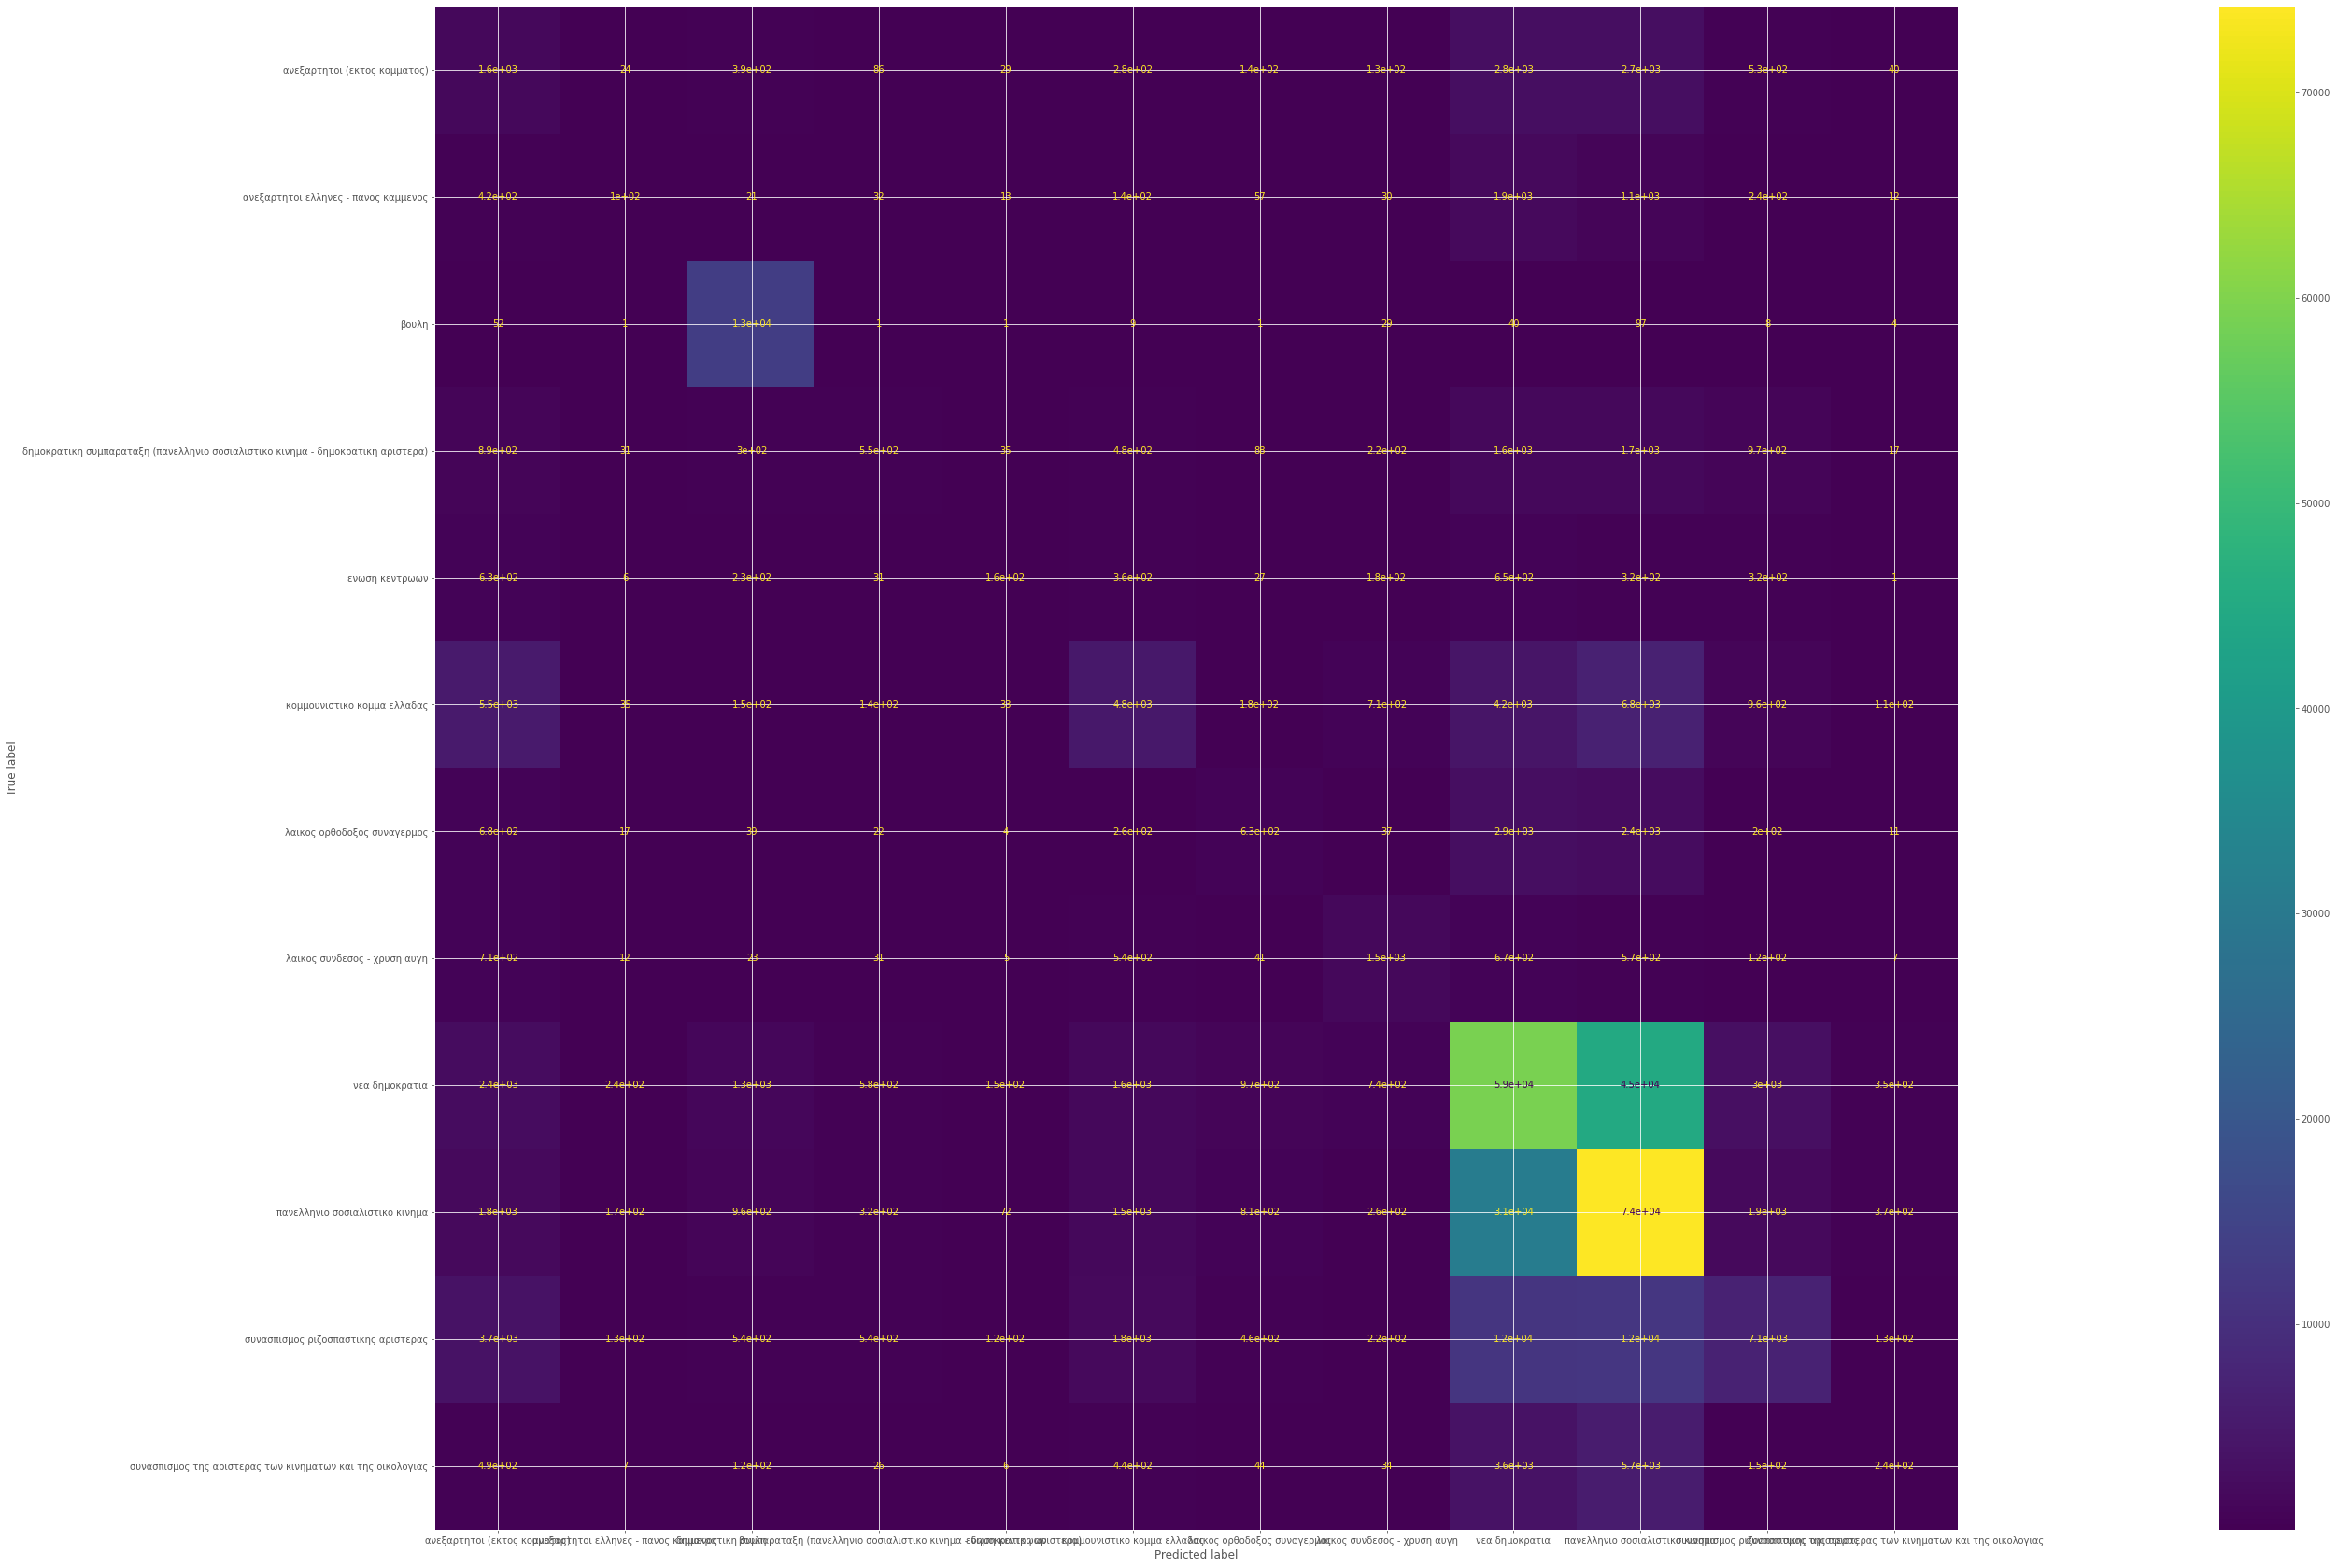

In [ ]:
fig, ax = plt.subplots(figsize=(100, 30))
metrics.plot_confusion_matrix(text_clfs, X_test, y_test, ax=ax)

Even though the accuracy is almost the same with naive bayes multinominal, we can see that this model has a better prediction in the meaning of total political parties that can be guessed (even just one time). The f1 score is not zero in most of the cases (in contrast with naive bayes which has high f1 in 3-4 parties and 0 in the rest. 

### Randomforest classifier
Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. However, due to time limit google colab didn't manage to complete this model. We will run it on a sample of the dataset just to have an example of output. We tried to run it on samples that could be significant (for example the last 10 years) but it didn't finish again. We will use just the first 10.000 values.

In [ ]:
classifyparliamentSAMPLE = classifyparliament[:10000]

from sklearn.model_selection import train_test_split
X, y = (classifyparliamentSAMPLE['speech'], 
        classifyparliamentSAMPLE['political_party'])
# Split the dataset into a training and a testing set
# Test set will be the 30% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42,shuffle=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
text_clff = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=200, random_state=0))
                    ])
text_clff.fit(X_train, y_train)
predicted = text_clff.predict(X_test)
np.mean(predicted == y_test)   

0.589

Let's print our classification report

In [ ]:
print(metrics.classification_report(y_test, predicted,
                                    ))

                                                            precision    recall  f1-score   support

                                                     βουλη       0.99      0.95      0.97        88
                               κομμουνιστικο κομμα ελλαδας       0.00      0.00      0.00        17
                    κομμουνιστικο κομμα ελλαδας εσωτερικου       0.00      0.00      0.00        57
                                            νεα δημοκρατια       0.59      0.70      0.64      1372
                            πανελληνιο σοσιαλιστικο κινημα       0.56      0.64      0.60      1102
συνασπισμος της αριστερας των κινηματων και της οικολογιας       0.52      0.04      0.07       364

                                                  accuracy                           0.59      3000
                                                 macro avg       0.44      0.39      0.38      3000
                                              weighted avg       0.57      0.59      0.55      300

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can also plot our confusion matrix.

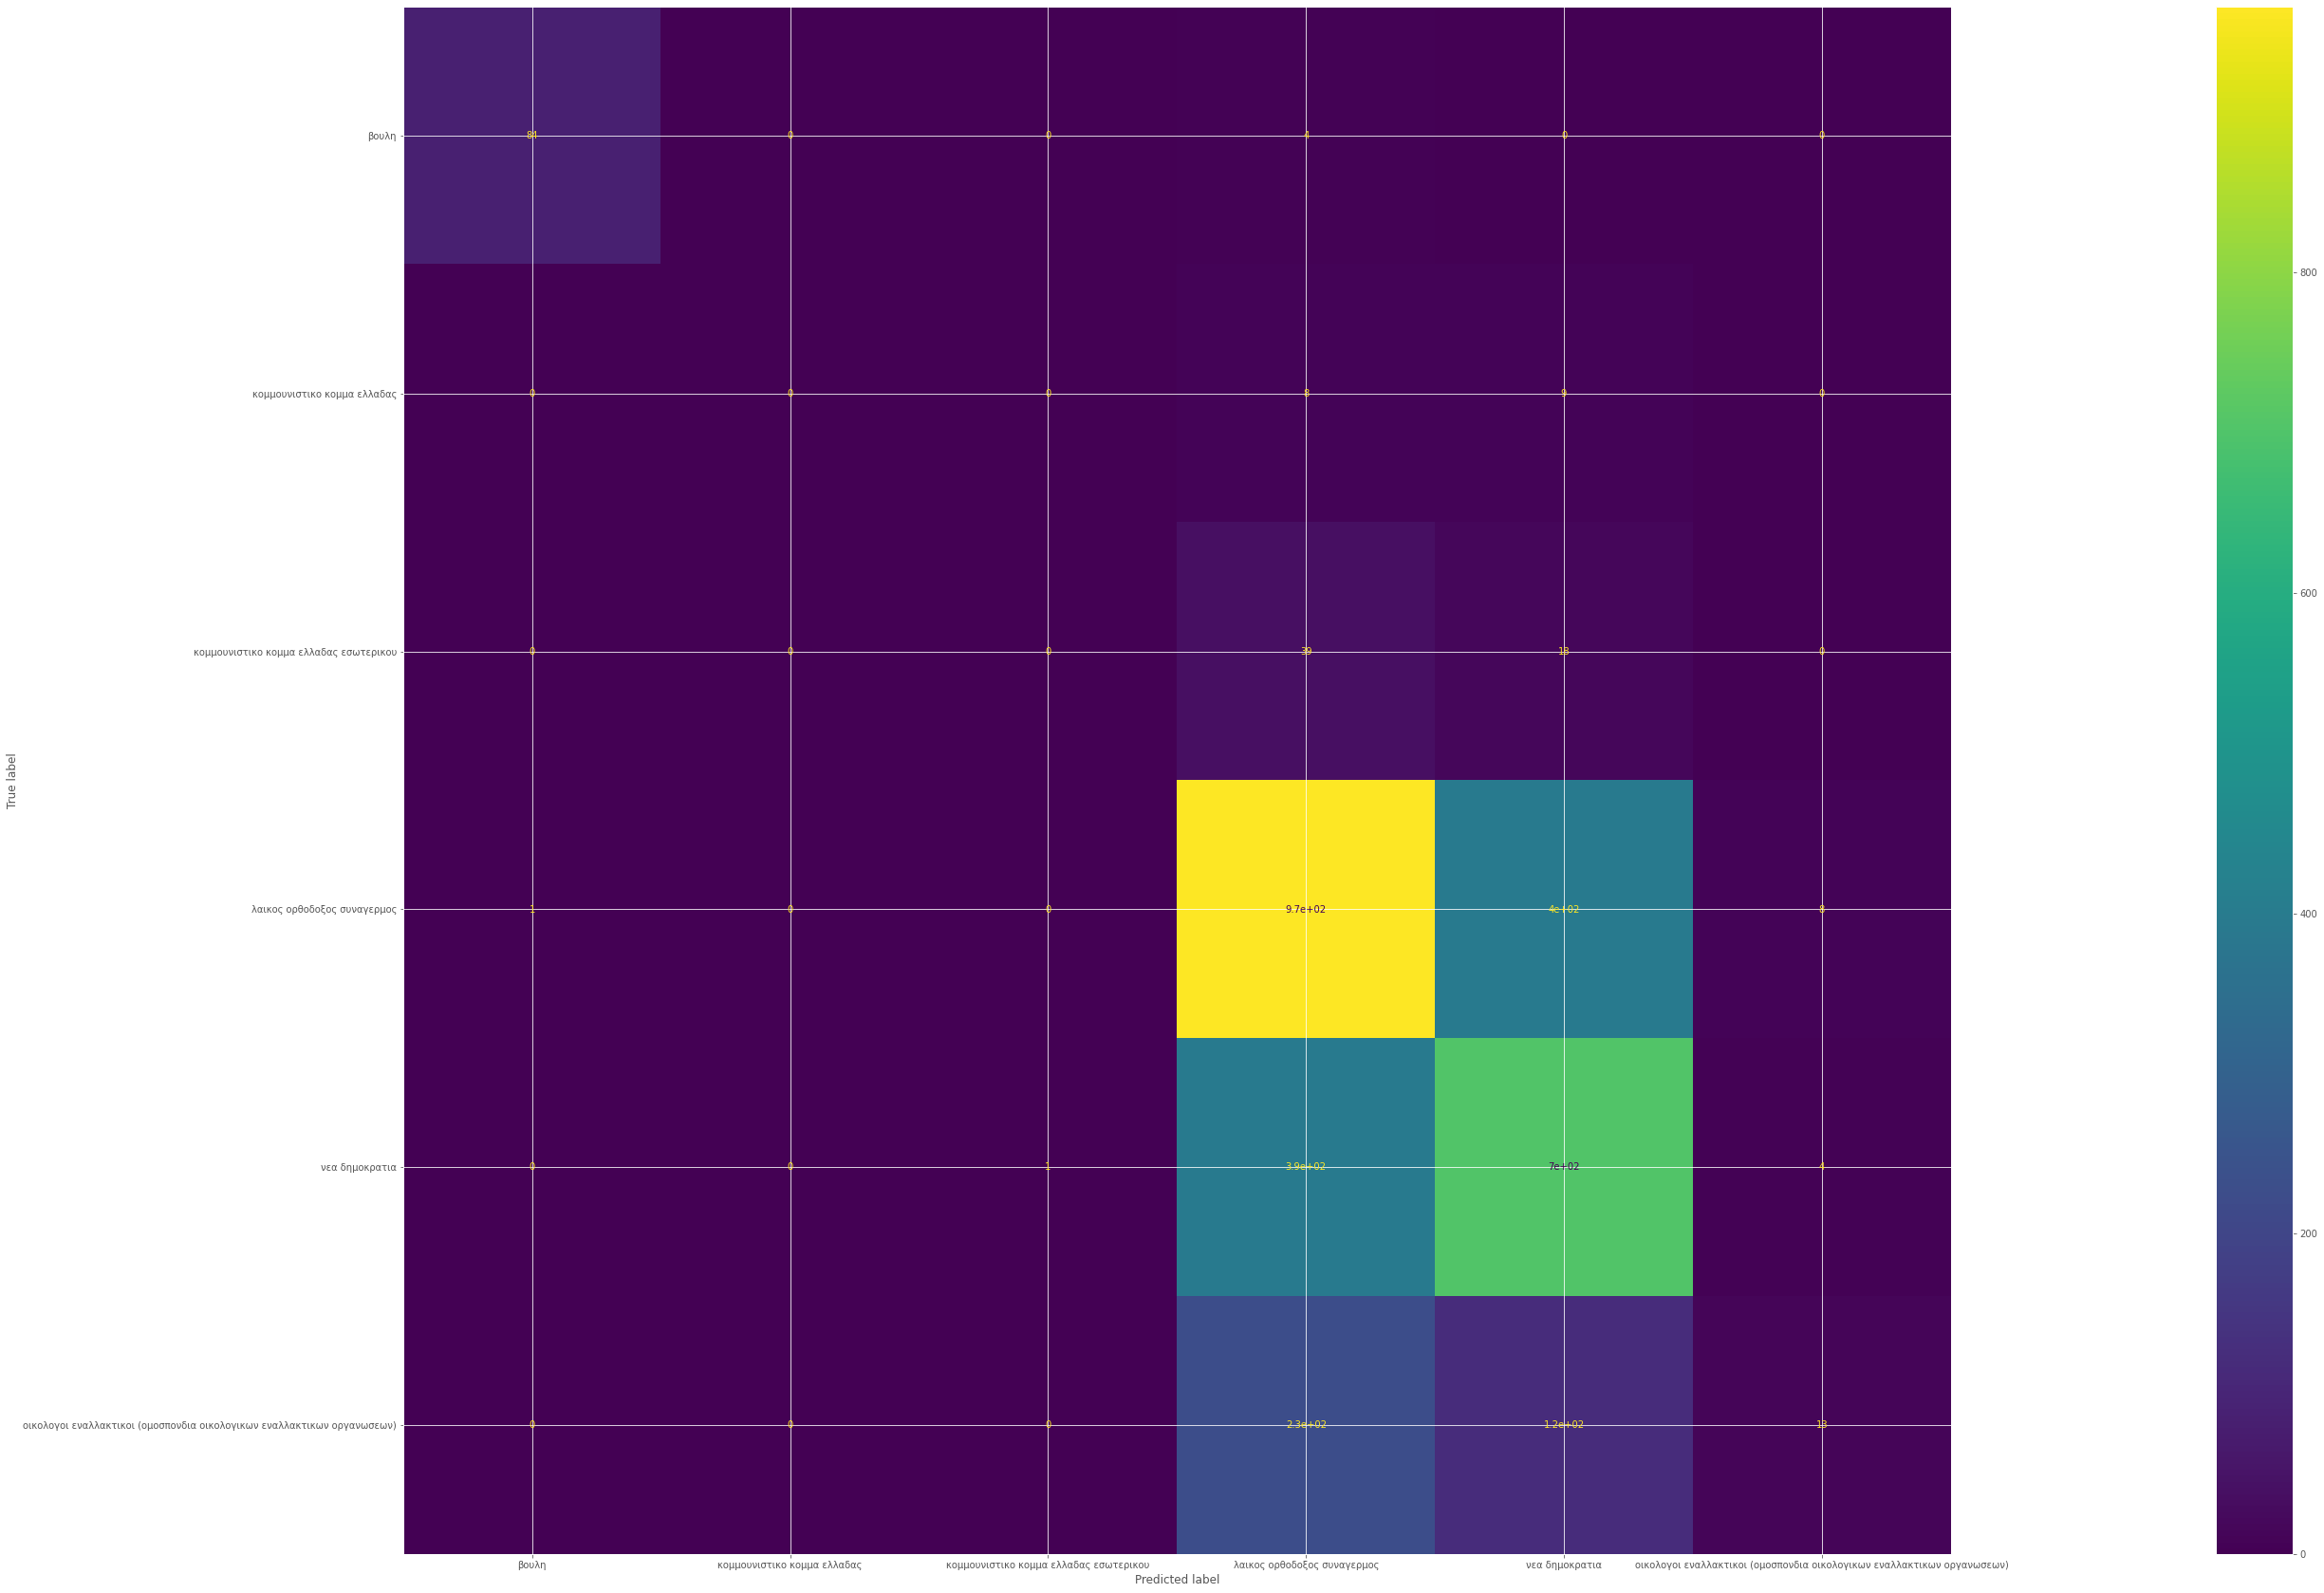

In [ ]:
fig, ax = plt.subplots(figsize=(100, 30))
metrics.plot_confusion_matrix(text_clff, X_test, y_test, ax=ax)

## XGB classifier from XGB boost

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. [(source)](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

Now it's time to see if we can get a better prediction by using the XGBoost Classifier.


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
text_clfx = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf',  XGBClassifier())
                    ])
text_clfx.fit(X_train, y_train)
predicted = text_clff.predict(X_test)
np.mean(predicted == y_test)   

0.589

We could also print the report and the confusion matrix, if we had worked on an important amount of data.

**Note: In all models presented, we have the vectorizing and the tfid transforming in the pipeline again and again in the pipelines, which will cost if we try ro run all the models at once, but if we want to see the behaviour of each one, or if we want to reuse one of them, its easier to use. Otherwise, we would need to copy other commands too, from other cells.**

### Evaluating Correctly

In order to get the best evaluation for the validation accuracy we could use the "cross_val_score", which performs a cross validation, and print the mean that we will get for a specific number of cv. We will use it later on gridsearch, and explain it in detail.

### Improve performance 


We may need to proccess our text before training it and testing it. We will try different combinations of the following proccesing:
* Remove punctuation (for example "Κυριε τι κανετε" instead of "Κύριε, τι κανετε;")
* Remove accent (for example "Κυριε" instead of "Κύριε"
* Turn words to lower case (for example "κύριε" instead of "Κύριε")
* Lemmatize words (for example "κύριος" instead of "Κύριε", or "κάνω" instead of "κάνετε")
* Remove stop words (for example "κυριος προσελθει εδρανο" instead of "ο κυριος να προσελθει στο εδρανο")
* Remove numbers from text (for example "ο κυριος" instead of "ο 0κυριος 12"

We will work on a 100 words example to show the result of this edit, but as the results were not encouraging we will not perform this on the whole dataset. (we already did but it costs too much time, and we cannot run it again)

Note: Specific combinations have also been tested, for example lemmatizing with the raw text, or lemmatizing with accent not removed, or training only without the stopwords. Some of these had a small improvement, thus we will show an example of improval. However for the rest of the assignment we will continue with the initial text.

In [ ]:
parliamentexample = classifyparliament[:1000]
parliamentexample.head(5)

political_party                                                                                               speech
0  πανελληνιο σοσιαλιστικο κινημα   Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να συνοδεύσει το Μακαριότατο Αρχιεπίσκοπο Αθηνών και π...
1  πανελληνιο σοσιαλιστικο κινημα   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσει την Ιερά Σύνοδο εκτός της Αιθούσης της Βουλής.  ...
2  πανελληνιο σοσιαλιστικο κινημα   Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσιοδοτήσει το Προεδρείο για την επικύρωση των Πρακτ...
3                           βουλη                                                                                    Μάλιστα, μάλιστα.
4  πανελληνιο σοσιαλιστικο κινημα   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Με τη συναίνεση της Βουλής και ώρα 10.27` λύεται η ...

We will first remove the punctutation.

In [ ]:
#remove punctuation
parliamentexample['fix_speech'] = parliamentexample['speech'].str.replace('[^\w\s]','')
parliamentexample.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



political_party  ...                                                                                           fix_speech
0  πανελληνιο σοσιαλιστικο κινημα  ...   Παρακαλείται ο Γραμματέας κ Βουλγαράκης να συνοδεύσει το Μακαριότατο Αρχιεπίσκοπο Αθηνών και πά...
1  πανελληνιο σοσιαλιστικο κινημα  ...   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσει την Ιερά Σύνοδο εκτός της Αιθούσης της Βουλής   ...
2  πανελληνιο σοσιαλιστικο κινημα  ...   Κύριοι συνάδελφοι παρακαλώ τη Βουλή να εξουσιοδοτήσει το Προεδρείο για την επικύρωση των Πρακτι...
3                           βουλη  ...                                                                                      Μάλιστα μάλιστα
4  πανελληνιο σοσιαλιστικο κινημα  ...   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση Με τη συναίνεση της Βουλής και ώρα 1027 λύεται η συν...

[5 rows x 3 columns]

We will then remove the numbers.

In [ ]:
#remove numbers 
parliamentexample['fix_speech'] = parliamentexample['fix_speech'].str.replace('\d+', '')
parliamentexample.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



political_party  ...                                                                                           fix_speech
0  πανελληνιο σοσιαλιστικο κινημα  ...   Παρακαλείται ο Γραμματέας κ Βουλγαράκης να συνοδεύσει το Μακαριότατο Αρχιεπίσκοπο Αθηνών και πά...
1  πανελληνιο σοσιαλιστικο κινημα  ...   Παρακαλείται ο κύριος Γραμματέας να συνοδεύσει την Ιερά Σύνοδο εκτός της Αιθούσης της Βουλής   ...
2  πανελληνιο σοσιαλιστικο κινημα  ...   Κύριοι συνάδελφοι παρακαλώ τη Βουλή να εξουσιοδοτήσει το Προεδρείο για την επικύρωση των Πρακτι...
3                           βουλη  ...                                                                                      Μάλιστα μάλιστα
4  πανελληνιο σοσιαλιστικο κινημα  ...   Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση Με τη συναίνεση της Βουλής και ώρα  λύεται η συνεδρί...

[5 rows x 3 columns]

We will then turn letters to lower case.

In [ ]:
#turn into lower case
parliamentexample['fix_speech'] = parliamentexample['fix_speech'].str.lower()
parliamentexample.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



political_party  ...                                                                                           fix_speech
0  πανελληνιο σοσιαλιστικο κινημα  ...   παρακαλείται ο γραμματέας κ βουλγαράκης να συνοδεύσει το μακαριότατο αρχιεπίσκοπο αθηνών και πά...
1  πανελληνιο σοσιαλιστικο κινημα  ...   παρακαλείται ο κύριος γραμματέας να συνοδεύσει την ιερά σύνοδο εκτός της αιθούσης της βουλής   ...
2  πανελληνιο σοσιαλιστικο κινημα  ...   κύριοι συνάδελφοι παρακαλώ τη βουλή να εξουσιοδοτήσει το προεδρείο για την επικύρωση των πρακτι...
3                           βουλη  ...                                                                                      μάλιστα μάλιστα
4  πανελληνιο σοσιαλιστικο κινημα  ...   η βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση με τη συναίνεση της βουλής και ώρα  λύεται η συνεδρί...

[5 rows x 3 columns]

We will then remove the greek accent.

In [ ]:
#remove accent def
import unicodedata
def strip_accents(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')
#remove accent
parliamentexample['fix_speech'] = parliamentexample['fix_speech'].apply(strip_accents)
parliamentexample.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



political_party  ...                                                                                           fix_speech
0  πανελληνιο σοσιαλιστικο κινημα  ...   παρακαλειται ο γραμματεας κ βουλγαρακης να συνοδευσει το μακαριοτατο αρχιεπισκοπο αθηνων και πα...
1  πανελληνιο σοσιαλιστικο κινημα  ...   παρακαλειται ο κυριος γραμματεας να συνοδευσει την ιερα συνοδο εκτος της αιθουσης της βουλης   ...
2  πανελληνιο σοσιαλιστικο κινημα  ...   κυριοι συναδελφοι παρακαλω τη βουλη να εξουσιοδοτησει το προεδρειο για την επικυρωση των πρακτι...
3                           βουλη  ...                                                                                      μαλιστα μαλιστα
4  πανελληνιο σοσιαλιστικο κινημα  ...   η βουλη παρεσχε τη ζητηθεισα εξουσιοδοτηση με τη συναινεση της βουλης και ωρα  λυεται η συνεδρι...

[5 rows x 3 columns]

For the removal of stopwords (and later for lemmatizing) we will use the spacy library, with the greek module. We will import stopwords, and then remove these words from the speeches. We will print the stopwords set to have an idea of the type of these words.

In [ ]:
nlp = spacy.load("el_core_news_sm")
from spacy.lang.el.stop_words import STOP_WORDS
print(STOP_WORDS)

{'περισσότερο', 'μιαν', 'μπορεί', 'μάλιστα', 'όλα', 'πάντα', 'άλλον', 'συχνών', 'περίπου', 'ακριβώς', 'συνεπώς', 'συγχρόνως', 'δήθεν', 'τουλάχιστο', 'ολωσδιόλου', 'ετούτην', 'μόλις', 'τελευταία', 'κάμποσην', 'τούτους', 'μόνοι', 'όποια', 'ίσως', 'τουλάχιστον', 'κατ', 'μην', 'κάποιαν', 'συχνόν', 'μέσα', 'ήταν', 'ξανά', 'οποίαν', 'ω', 'όποιος', 'κάμποσους', 'αρκετά', 'στης', 'εγώ', 'έξαφνα', 'έχομε', 'όλους', 'κάποιοι', 'οσονδήποτε', 'εχτές', 'ωσάν', 'τέτοιος', 'προχθές', 'εντελώς', 'πρώτη', 'όσο', 'αυτός', 'οποιουδήποτε', 'στη', 'άλλων', 'τέτοιον', 'έτερης', 'τόσες', 'εκτός', 'εαυτών', 'προκειμένου', 'κανένας', 'πλάι', 'έχω', 'έχει', 'τούτη', 'προτού', 'τον', 'μάλλον', 'κάνεν', 'ολότελα', 'ας', 'κάμποσης', 'καλά', 'τόσους', 'μήδε', 'δίχως', 'τούς', 'μερικές', 'κάμποση', 'εκείνος', 'αλλαχού', 'αύριο', 'όσον', 'τόσα', 'τόσην', 'τόσος', 'όσην', 'τοσ', 'είχατε', 'έγκαιρα', 'ποιούς', 'ποιάν', 'το', 'συχνές', 'εσένα', 'καμίαν', 'έγιναν', 'ανά', 'ετούτον', 'είμαι', 'ώστε', 'μα', 'όσων', 'έγινε'

In [ ]:
#remove stop words
parliamentexample['fix_speech'] = parliamentexample['fix_speech'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))
parliamentexample.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



political_party  ...                                                                                           fix_speech
0  πανελληνιο σοσιαλιστικο κινημα  ...  παρακαλειται γραμματεας κ βουλγαρακης συνοδευσει μακαριοτατο αρχιεπισκοπο αθηνων πασης ελλαδος κ...
1  πανελληνιο σοσιαλιστικο κινημα  ...  παρακαλειται κυριος γραμματεας συνοδευσει ιερα συνοδο εκτος αιθουσης βουλης παρακαλειται συναδελ...
2  πανελληνιο σοσιαλιστικο κινημα  ...  κυριοι συναδελφοι παρακαλω βουλη εξουσιοδοτησει προεδρειο επικυρωση πρακτικων σημερινης συνεδρια...
3                           βουλη  ...                                                                                      μαλιστα μαλιστα
4  πανελληνιο σοσιαλιστικο κινημα  ...  βουλη παρεσχε ζητηθεισα εξουσιοδοτηση συναινεση βουλης ωρα λυεται συνεδριαση αυριο ημερα τριτη ι...

[5 rows x 3 columns]

Now for lemmatizing, we will need first to turn each speech into tokens (creates a list with each word separatey) by calling the nlp(x). Then we will call the method ".lemma_" which gives 

In [ ]:
#lemmatize
parliamentexample['fix_speech'] = parliamentexample['fix_speech'].apply(lambda x: [y.lemma_ for y in  nlp(x)])
parliamentexample.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



political_party  ...                                                                                           fix_speech
0  πανελληνιο σοσιαλιστικο κινημα  ...  [παρακαλειται, γραμματεας, κ, βουλγαρακη, συνοδευσω, μακαριοτατος, αρχιεπισκοπο, αθηνος, παση, ε...
1  πανελληνιο σοσιαλιστικο κινημα  ...  [παρακαλειται, κυριος, γραμματεας, συνοδευσω, ιερος, συνοδο, εκ, αιθουση, βουλη, παρακαλειται, σ...
2  πανελληνιο σοσιαλιστικο κινημα  ...  [κυριος, συναδελφοι, παρακαλω, βουλη, εξουσιοδοτησω, προεδρειο, επικυρωση, πρακτικο, σημερινης, ...
3                           βουλη  ...                                                                                   [μαλιστα, μαλιστα]
4  πανελληνιο σοσιαλιστικο κινημα  ...  [βουλη, παρεσχε, ζητηθεομαι, εξουσιοδοτηση, συναινεση, βουλη, ωρα, λυομαι, συνεδριαση, αυριο, ημ...

[5 rows x 3 columns]

Lemmatization is the conversion of each word to its base form, the lemma that we encounter in dictionaries. However we can clearly see that the result for greek is dissapointing. 

In order to test one of these cases we need to change the parliamentexample dataframe with our original dataframe (for example classifyparliament["fix_speech"]) and reproduce all steps from splitting and below. We will show an example of running Naive bayes multinominal without stopwords

In [ ]:
classifyparliament["fix_speech"] = classifyparliament['speech'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))

In [ ]:
from sklearn.model_selection import train_test_split
X, y = (classifyparliament['fix_speech'], 
        classifyparliament['political_party'])
# Split the dataset into a training and a testing set
# Test set will be the 30% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42,shuffle=True)

In [ ]:
#multinominal naive bayes
text_clfm.fit(X_train, y_train)
predicted = text_clfm.predict(X_test)
np.mean(predicted == y_test)

0.4744468102155523

In [ ]:
#Stohastic
text_clfs.fit(X_train, y_train)
predicted = text_clfs.predict(X_test)
np.mean(predicted == y_test)   

0.47260093638746753

We can see that the accuracy shows some small differences. Even 0,5% is an improvement but we won't use the fixed speech for the rest of the assignment because we would need to do all the rest in 2 ways, one with fix speech and one with speech, to check which does better each time.

## Parameter tuning


Our models can predict some speeches correctly, however we can improve it by looking at the steps of the classification, by changing the parameters for bag of words, for tf-idf construction and for the classifier. For example we have the following parameters:

* use_idf in TfidfTransformer
* MultinomialNB includes a smoothing parameter alpha
* SGDClassifier has a penalty parameter alpha

Instead of tweaking the parameters of the various components of the chain, it is possible to run an exhaustive search of the best parameters on a grid of possible values.

We will try for all classifiers, on either words or bigrams, with or without idf, and with classifier parameters, such as penalty parameter for SDG.

### Multinominal

The following grid search parameteres were implemented for the multinominal classifier, which has the smoothing parameter alpha

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3)
             }

Here we specify the classifier which is clfm (m stands for multinominal)

In [ ]:
gs_clf = GridSearchCV(text_clfm, parameters, cv=5)

And finally we fit our grid search. 

In [ ]:
gs_clf = gs_clf.fit(X_train, y_train)

We can print the best parameters to have a look on the result

In [ ]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

We can now use the model that we created to predict our test speeches. We don't need to bring back our initial multinominal model and insert the parameters, as the gs_slf is a trained model with these paramaters.

In [ ]:
predicted = gs_clf.predict(X_test)
np.mean(predicted == y_test)
print(metrics.classification_report(y_test, predicted,))

The result can be found [here](https://drive.google.com/file/d/12uR760RYVO-LbrkP9JhOLAxTjZ4sCkU0/view?usp=sharing) , and we can see an important rise of 5% on the accuracy. Also it might be a little higher, because when running it we forgot to remove 2 parties, that had low support.

We could also print the confusion matrix but the machine timed out and we couldn't re-run the whole procedure. But we can already see in the report that the results are improved. 

**Note** For the rest of the classifiers the execution of commands never finished. 
However, we will show the commands that we could have executed.

### Stohastic


These are some parameters that could have been tested for SDG

In [ ]:
#Parameters that did not finish
from sklearn.model_selection import GridSearchCV
parameters = {'clf__alpha': (1.0000000000000001e-05, 9.9999999999999995e-07),
 'clf__max_iter': (10, 50, 80),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000)}

In [ ]:
gs_clf = GridSearchCV(text_clfs, parameters, cv=5)

In [ ]:
gs_clf = gs_clf.fit(X_train, y_train)

### Random Forest
Random Forest has the following hyperparameters that can be tested
* bootstrap
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

An example of different values for these parameters is show below, but not executed due to time limits.

In [ ]:
params = {
        'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
        }

### XGB
 


XGB has the following parameters that can be tested:
* min_child_weight
* gamma
* subsample
* colsample_bytree
* max_depth

An example of different values for these parameters is show below, but not executed due to time limits.

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth'
          }

Finally, another way of improving our selection of algorithms, is to use Cross Validation(CV) which is very similar to train-test split. We already used it above on the gridsearch but did not explain its importance. In k-fold cross validation what we do is having multiple(k) train-test sets instead of 1. This basically means that in a k-fold CV we will be training our model k-times and also testing it k-times. The purpose of doing this is that in a single train-test split, the test part of our data that we chose might be really easy to predict and our model will perform extremely well on it but not for a diefferent set. If we don't set a specific number the default for gridsearchcv is 5-fold cross validation.

## RNN

For the classification with neural networks we will use the x,y trainset a test set we created above. The only diffenrence is that we will treat the political parties as dummy variables so that names will be decoded into numbers. 

In [ ]:
X, y = (classifyparliament['speech'], 
        pd.get_dummies(classifyparliament['political_party']).values)
# Split the dataset into a training and a testing set
# Test set will be the 30% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42,shuffle=True)

To start with, we will need to define a sequence length. That's because when we will use tensorflow, we will need to have the same length for all, thus we will either take the max length of all speeches and set it as sequence length, or take the median, or try different estimates of our choice.

 We first need to get the length of each row and pass it to a new column called "Speech_Length "

In [ ]:
classifyparliament['Speech_Length'] = classifyparliament['speech'].str.len()
classifyparliament.head(5)

political_party  ... Speech_Length
0  πανελληνιο σοσιαλιστικο κινημα  ...           298
1  πανελληνιο σοσιαλιστικο κινημα  ...           510
2  πανελληνιο σοσιαλιστικο κινημα  ...           128
3                           βουλη  ...            18
4  πανελληνιο σοσιαλιστικο κινημα  ...           235

[5 rows x 3 columns]

Now we will calculate the median of the column speech_length and set sequence_length equal to median. We will do that for efficiency reasons, but for an ideal solution we would use the maximum length from the speech_length so we won't miss a single word from the sentences.

In [ ]:
median = classifyparliament['Speech_Length'].median()
median

76.0

We can also keep the mean, which is very different, and include it in our trials

In [ ]:
mean = classifyparliament['Speech_Length'].mean()
mean

865.4587394623943

We can now set the seq_length as the median

In [ ]:
seq_length = median

We will also convert seq_length to integer, as this type is accepted for the maxlen parameter we will use later.

In [ ]:
seq_length = int(seq_length) 

Now we will count how many words exist in the whole training dataset. We will create a method that will use counter. This will count the unique words for each sentence.

In [ ]:
from collections import Counter

# Count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count


Then we will apply this method to the whole training dataset.

In [ ]:
#Count words to be trained
text = X_train
counter = counter_word(text)
num_words = len(counter)
num_words

1567375

This means that we have 1567375 unique words

We can also print the counter objet to see each words and how many times it appears.

In [ ]:
counter

Counter({'Κύριε': 139006,
         'Πρόεδρε,': 120501,
         'είχαν': 39988,
         'συνενωθεί': 32,
         'κάποιες': 25652,
         'κοινότητες': 1661,
         'στο': 601141,
         'Νομό': 6771,
         'Μαγνησίας': 1697,
         'και': 3984165,
         'κατά': 171508,
         'της': 1666837,
         'συνενώσεως,': 6,
         'του': 1670244,
         'διατάγματος,': 432,
         'είχε': 81417,
         'ασκηθεί': 1167,
         'προσφυγή': 1930,
         'Συμβούλιο': 16839,
         'Επικρατείας': 5481,
         'παράλληλα': 6833,
         'ζητηθεί': 963,
         'αναστολή': 2589,
         'εφαρμογής': 7149,
         'η': 1408202,
         'οποία': 258072,
         'δόθηκε.Έτσι,': 1,
         'όταν': 129064,
         'φτάσαμε': 1843,
         'στις': 199748,
         'εκλογές,': 4148,
         'δεν': 1039489,
         'μπορούσε': 22792,
         'να': 2970058,
         'γίνει': 94510,
         'εκλογή': 2548,
         'δήμο,': 567,
         'αφού': 41098,
        

We will now use the tokenizer to tokenize the sentences. We will do this by fiting the tokenizer to our training dataset. After running this command each word will have its unique index

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

We can now use these indexes to create the sequence of the sentence, but now each sentence instead of words, we will have their index.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)

Now we will pad these sequences to have the same length which is the one we calculated earlier, the seq_length. That's because when we will use lstm, we will need to have sequences of the same length, so that it can work. So now if we have a sentence that was smaller than the seq_length it will be filled with zeros to have the same length, or if its bigger, it will be cut to fit our length.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    train_sequences, maxlen=seq_length, padding="post", truncating="post"
)

We will do the same for the test sequences.

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    test_sequences, maxlen=seq_length, padding="post", truncating="post"
)

If we want to visualize the result of this procedure we can see the original sentence and the one that has been created after tokenizing and padding.

In [ ]:
X_trainn = np.asarray(X_train)
print(X_trainn[0])
print(train_sequences[0])

 Κύριε Πρόεδρε, είχαν συνενωθεί κάποιες κοινότητες στο Νομό Μαγνησίας και κατά της συνενώσεως, κατά του διατάγματος, είχε ασκηθεί προσφυγή στο Συμβούλιο Επικρατείας και παράλληλα είχε ζητηθεί αναστολή εφαρμογής του διατάγματος, η οποία και δόθηκε.Έτσι, όταν φτάσαμε στις εκλογές, δεν μπορούσε να γίνει εκλογή στο δήμο, αφού υπήρχε η εκκρεμότητα αυτή και έγινε εκλογή στις επιμέρους κοινότητες. Εν τω μεταξύ, η υπόθεση εκδικάστηκε στο Συμβούλιο Επικρατείας, βγήκε η απόφαση, απερρίφθη η προσφυγή, επομένως το διάταγμα συστάσεως του δήμου είναι ισχυρό και πρόκειται να γίνουν εκλογές εντός του προσεχούς 3μήνου. Έτσι, και ο κύριος συνάδελφος ως ερωτών είναι ικανοποιημένος από την εξέλιξη και οι άλλοι είναι ικανοποιημένοι γιατί έκαναν και εκείνοι εκλογές στις κοινότητες!
[32, 55, 265, 57795, 440, 2961, 25, 945, 4024, 1, 52, 5, 66930, 52, 4, 3716, 111, 6518, 4164, 25, 396, 1008, 1, 822, 111, 6981, 3183, 1278, 4, 3716, 7, 41, 1, 1247, 107, 73, 3676, 54, 574, 12, 481, 2, 97, 3313, 25, 1584, 231, 437

Now we can build the model. We will use an LSTM architecture and specifically we will use 64 LSTM cells. The output layer must create 12 output values, one for each class-political party.


Before that, we will use the embedding layer which can map each word to a vector of a fixed size with real value elements. The dimensionality of this layer will be 32, and for the input length we will use the seq_length we calculated earlier.

Also, as we are padding the input, we need to let the RNN know that some values that it receives are actually padding.
This is done by passing a mask that indicates the padding values.
We do that by passing mask_zero=True to the embedding layer to simply mask out those excessive 0 tokens so that they wouldn't affect the outputs of the model during training.

Finally our activation function will be softmax and our optimizer will be adam.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 32, input_length=seq_length,mask_zero=True))
model.add(LSTM(64, dropout=0.1))
model.add(Dense(12, activation="softmax"))


optimizer = Adam(learning_rate=3e-4)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

We can now see the model summary to have an overview.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 76, 32)            50156000  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 12)                780       
Total params: 50,181,612
Trainable params: 50,181,612
Non-trainable params: 0
_________________________________________________________________


Finally, we will fit our model to the training dataset and print the validation accuracy for each epoch. Let's run it and we will exaplain more after having the result.

In [ ]:
history = model.fit(
    train_padded, y_train, epochs=20,batch_size=32, validation_data=(test_padded, y_test),
)

Epoch 1/20
25480/25480 [==============================] - 7631s 299ms/step - loss: 1.4649 - accuracy: 0.4425 - val_loss: 1.3834 - val_accuracy: 0.4796
Epoch 2/20
25480/25480 [==============================] - 7602s 298ms/step - loss: 1.3338 - accuracy: 0.5039 - val_loss: 1.3414 - val_accuracy: 0.4948
Epoch 3/20
25480/25480 [==============================] - 7582s 298ms/step - loss: 1.2664 - accuracy: 0.5304 - val_loss: 1.3159 - val_accuracy: 0.5043
Epoch 4/20
25480/25480 [==============================] - 7579s 297ms/step - loss: 1.2121 - accuracy: 0.5522 - val_loss: 1.3132 - val_accuracy: 0.5071
Epoch 5/20
16366/25480 [==================>...........] - ETA: 44:50 - loss: 1.1583 - accuracy: 0.5738

The val_accuracy is what we are interested in, and we can see that the more training it gets, the better validationa curacy we have. Unfortunately, we only managed to run 4 epochs before the kernel was shut down.

## Explaining our model

Since the model is built from us from the scratch, there are a lot of details we did not explain, and a lot of changes that could be tried out. We will see some important details.

### Activation Function

One important factor in our model is the activation function that we use  in the third layer. Above we used the softmax activation, which is the one that is most used fot multi-class classification that is mutually exclusive. Other functions we can use is sigmoid or relu but we won't try them as they are not meant for our problem. For example sigmoid is also for multi class but not for mutually exclusive classes.


### Batch and Epoch

In our model we also used batch size and epochs that we did not explain.

* One epoch is one forward pass and one backward pass of all the training examples(we do not count the forward pass and backward pass as two different passes)
* Batch size is the number of training examples in one forward/backward pass. The higher the batch size, the more memory space we'll need.

Regarding Epochs, we can start with a small number, then start to raise it and check the behaviour on the validation data. We can also set a very high number of epochs (if we have a machine that can manage it) and print a diagram of how validation accuracy and loss behave on each number of epochs. Note that too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. 

Regarding batch size, its default value is 32. It is [suggested](https://ai.stackexchange.com/questions/8560/how-do-i-choose-the-optimal-batch-size) that "in general, batch size of 32 is a good starting point, and we should also try with 64, 128, and 256. Other values (lower or higher) may be fine for some data sets, but the given range is generally the best to start experimenting with. Though, under 32, it might get too slow because of significantly lower computational speed, because of not exploiting vectorization to the full extent."

For our example we won't try other epochs as we can't raise it more due to time limits (the colab kernel is shut down after some hours).

For the batch size we will aply it to:
* 32 batches
* 64 batches
* 128 batches
* 256 batches

The comparison can be found [here](https://drive.google.com/file/d/1fbNOfJSyGpLKhwJOOKGAIwcisil5wx7S/view?usp=sharing)

### Input Length

Above we calculated the median and chose this as our max length of sentences. However, this way we cut a lot of speeches that have more than the median. We can raise the max length, by choosing the real maximum length, or just higher numbers, but this will require more time for the whole proccess. We will try with a length of 250 to see the difference. The comparison for length of 75 vs 250 is [here](https://docs.google.com/document/d/1VfwkPbqd_sx_yqzKyU1TjSg3xRGzvVCOExLkC2_ssYw/edit?usp=sharing)

Last, as we have a multi-class classification problem, categorical_crossentropy is used as the loss function.

# Speech generator

Our final goal is to produce a speech which will look like to a real speech, like the ones we are working on. For our example we will use "Ζωη Κωνστατοπούλου" speeches, so that we won't produce a random political speech, but one that could (ideally) look like her speeches.We will first import the libraries we will need for this part.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

from bs4 import BeautifulSoup
import re
import numpy as np

import os
import time

We will now filter the speeches to keep only πολακης's speeches.

In [ ]:
speeches = parliament[parliament['member_name'].isin(['κωνσταντοπουλου ν. ζωη'])]

We combine all the speeches into one string.

In [ ]:
text = ''.join(speeches.speech)


We will now count all the unique characters in the file.

In [ ]:
vocab = sorted(set(text))
print('{} unique characters'.format(len(vocab)))

158 unique characters


## Process the text
### Vectorize the text

Before training, we will need to convert the strings to a numerical representation. 
The `preprocessing.StringLookup` layer can convert each character into a numeric ID. It just needs the text to be split into tokens first.

In [ ]:
ids_from_chars = preprocessing.StringLookup(vocabulary=list(vocab))

The layer returns a `tf.RaggedTensor` of IDs. A `tf.RaggedTensor` is a tensor with one or more *ragged dimensions*, that is, with different lengths.

Since our goal is to generate text, it will also be important to invert this representation and recover human-readable strings from it.

For this we can use preprocessing.StringLookup(..., invert=True).

Here instead of passing the original vocabulary generated with sorted(set(text)) we will use the get_vocabulary() method of the preprocessing.StringLookup layer so that the padding and [UNK] tokens(which are used for Out-Of-Vocabulary (OOV) tokens) are set the same way.

In [ ]:
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True)

We can now use tf.strings.reduce_join to join the characters back into strings.
We will use a helper function for that.

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

### Prediction

Our goal for the prediction is to find what is the most probable next character, given a character, or a sequence of characters.

We will create a model to train for this predition. The input to the model will be a sequence of characters, and we will train it to predict the output—the following character at each time step. Since RNNs maintain an internal state that depends on the previously seen elements, given all the characters computed until this moment, what is the next character?


### Create training examples and targets

We'll divide the text into example sequences. Each input sequence will contain `seq_length` characters from the text. For each input sequence, the corresponding targets contain the same length of text, except shifted one character to the right. So, we'll break the text into chunks of `seq_length+1`. 

First, we'll split all text into a tensor of integer IDs.

In [ ]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(2237809,), dtype=int64, numpy=array([  2, 103, 152, ...,  11,   2,   2])>

Then, we'll convert all_ids to a Dataset.

To do this we'll use the tf.data.Dataset.from_tensor_slices function to convert the text vector into a stream of character indices.

In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

We'll use sequences of seq_length 150 characters 

As we want to predict the next character for each character, we'll actually break the text in batches of 150+1 characters.

Therefore for the 150th character we'll want to predict the 151th.

In [ ]:
seq_length = 150
examples_per_epoch = len(text)//(seq_length+1)

* The `batch()` method lets us easily convert these individual characters to sequences of the desired size.

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b' ' b'\xce\x9a' b'\xcf\x8d' b'\xcf\x81' b'\xce\xb9' b'\xce\xb5' b' '
 b'\xce\xa0' b'\xcf\x81' b'\xcf\x8c' b'\xce\xb5' b'\xce\xb4' b'\xcf\x81'
 b'\xce\xb5' b',' b' ' b'\xce\xb4' b'\xce\xb5' b'\xce\xbd' b' '
 b'\xcf\x80' b'\xcf\x81' b'\xce\xad' b'\xcf\x80' b'\xce\xb5' b'\xce\xb9'
 b' ' b'\xce\xbd' b'\xce\xb1' b' ' b'\xce\xb3' b'\xce\xaf' b'\xce\xbd'
 b'\xce\xb5' b'\xce\xb9' b' ' b'\xce\xb5' b'\xce\xbd' b'\xce\xb1'
 b'\xce\xbb' b'\xce\xbb' b'\xce\xb1' b'\xce\xb3' b'\xce\xae' b' '
 b'\xcf\x83' b'\xcf\x84' b'\xce\xb7' b' ' b'\xcf\x83' b'\xce\xb5'
 b'\xce\xb9' b'\xcf\x81' b'\xce\xac' b' ' b'\xcf\x84' b'\xcf\x89'
 b'\xce\xbd' b' ' b'\xce\x92' b'\xce\xbf' b'\xcf\x85' b'\xce\xbb'
 b'\xce\xb5' b'\xcf\x85' b'\xcf\x84' b'\xcf\x8e' b'\xce\xbd' b';' b' '
 b'\xce\x9a' b'\xcf\x85' b'\xcf\x81' b'\xce\xaf' b'\xce\xb5' b'\xcf\x82'
 b' ' b'\xce\xba' b'\xce\xb1' b'\xce\xb9' b' ' b'\xce\xba' b'\xcf\x8d'
 b'\xcf\x81' b'\xce\xb9' b'\xce\xbf' b'\xce\xb9' b' ' b'\xce\x92'
 b'\xce\xbf' b'\xcf\x85' b

It's easier to see what this is doing if we join the tokens back into strings:

In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy().decode('utf-8'))

 Κύριε Πρόεδρε, δεν πρέπει να γίνει εναλλαγή στη σειρά των Βουλευτών; Κυρίες και κύριοι Βουλευτές, ζούμε περίοδο υπαρξιακής δοκιμασίας για τη χώρα μας.
 Και η Βουλή, η Εθνική Αντιπροσωπεία, έχει ιστορικό καθήκον να εκπροσωπήσει ευόρκως την κοινωνία και το λαό. Να προασπίσει τη δημοκρατία. Να διασφαλίσε
ι την κοινωνική δικαιοσύνη και να θωρακίσει όλους εκείνους που η φωνή τους και η ζωή τους καταπνίγονται στο βόρβορο των μνημονίων.Έχοντας πυξίδα την υπ
οχρέωση σεβασμού στο Σύνταγμα και πίστη στην πατρίδα, τον όρκο του Βουλευτή που πριν από λίγες ημέρες όλοι δώσαμε, απευθύνομαι στο Σώμα, αλλά και στην 
Κυβέρνηση. Κύριοι της Κυβέρνησης, εγκαινιάσατε τη θητεία σας παραβιάζοντας το Σύνταγμα. Εκκινήσατε τη διαδικασία Προγραμματικών Δηλώσεων μετά την παρέλ


For training we'll need a dataset of (input, label) pairs. Where input and label are sequences. At each time step the input is the current character and the label is the next character.

Here's a function that takes a sequence as input, duplicates, and shifts it to align the input and label for each timestep:

In [ ]:
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text

We will now take the `sequences` `Dataset` and produce a dataset of inputs and targets.

In [ ]:
dataset = sequences.map(split_input_target)

Let's see the first input and target.

In [ ]:
for input_example, target_example in  dataset.take(1):
  print("Input :", text_from_ids(input_example).numpy().decode('utf-8'))
  print("Target:", text_from_ids(target_example).numpy().decode('utf-8'))

Input :  Κύριε Πρόεδρε, δεν πρέπει να γίνει εναλλαγή στη σειρά των Βουλευτών; Κυρίες και κύριοι Βουλευτές, ζούμε περίοδο υπαρξιακής δοκιμασίας για τη χώρα μας
Target: Κύριε Πρόεδρε, δεν πρέπει να γίνει εναλλαγή στη σειρά των Βουλευτών; Κυρίες και κύριοι Βουλευτές, ζούμε περίοδο υπαρξιακής δοκιμασίας για τη χώρα μας.


### Create training batches

We used `tf.data` to split the text into manageable sequences but before feeding this data into the model, we need to shuffle the data and pack it into batches.

In [ ]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset shapes: ((64, 150), (64, 150)), types: (tf.int64, tf.int64)>

## Build The Model

Our model has three layers:
* `tf.keras.layers.Embedding`: The input layer. A trainable lookup table that will map each character-ID to a vector with `embedding_dim` dimensions;
* `tf.keras.layers.GRU`: A type of RNN with size `units=rnn_units` 
* `tf.keras.layers.Dense`: The output layer, with `vocab_size` outputs. It outpts one logit for each character in the vocabulary. These are the log-liklihood of each character according to the model.

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

RNNs have an internal state that acts as their memory. GRUs have one state.We'll want to reuse the internal state. When, after training, we'll be generating text, we'll be feeding our model with a character and its previous state in order to produce a new character. That's why in our model we are using `return_state=True`, so that we can get the existing state. That's also why in `call()` we can pass a state explicitly.

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True, 
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else: 
      return x

In [ ]:
model = MyModel(
    # make sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

## Try the model

Now we will run the model to see that it behaves as expected.

We will first check the shape of the output:

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 150, 160) # (batch_size, sequence_length, vocab_size)


In [ ]:
model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  40960     
_________________________________________________________________
gru_1 (GRU)                  multiple                  3938304   
_________________________________________________________________
dense_1 (Dense)              multiple                  164000    
Total params: 4,143,264
Trainable params: 4,143,264
Non-trainable params: 0
_________________________________________________________________


## Train the model

Now that it's time to train our model, we will treat our problem as a standard classification problem. 

Given the previous RNN state, and the input this time step,we will predict the class of the next character.
### Attach an optimizer, and a loss function

The standard `tf.keras.losses.sparse_categorical_crossentropy` loss function works in this case because it is applied across the last dimension of the predictions.

Because our model returns logits, we need to set the `from_logits` flag.


In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

We can now configure the training procedure using the `tf.keras.Model.compile` method. We use `tf.keras.optimizers.Adam` with default arguments and the loss function.

In [ ]:
model.compile(optimizer='adam', loss=loss)

### Configure checkpoints

We will use a `tf.keras.callbacks.ModelCheckpoint` to ensure that checkpoints are saved during training. Checkpoints save the state of the model at the end of each epoch. In this way, we can resume training later one if training is interrupted, or if we want to continue for more epochs.

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints-erotokritos'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    verbose=1,
    save_weights_only=True)

### Execute the training

We'll train for 50 epochs. We can adjust the epochs to less or more to compare the results. However we should be carefull with overfiting, which will lead us to taking the exact same speech, because it will be memorized completely.

In [ ]:
EPOCHS = 40
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/40
231/231 [==============================] - 17s 62ms/step - loss: 3.2464

Epoch 00001: saving model to ./training_checkpoints-erotokritos/ckpt_1
Epoch 2/40
231/231 [==============================] - 15s 61ms/step - loss: 1.7758

Epoch 00002: saving model to ./training_checkpoints-erotokritos/ckpt_2
Epoch 3/40
231/231 [==============================] - 15s 62ms/step - loss: 1.3376

Epoch 00003: saving model to ./training_checkpoints-erotokritos/ckpt_3
Epoch 4/40
231/231 [==============================] - 15s 62ms/step - loss: 1.1660

Epoch 00004: saving model to ./training_checkpoints-erotokritos/ckpt_4
Epoch 5/40
231/231 [==============================] - 16s 62ms/step - loss: 1.0764

Epoch 00005: saving model to ./training_checkpoints-erotokritos/ckpt_5
Epoch 6/40
231/231 [==============================] - 15s 62ms/step - loss: 1.0181

Epoch 00006: saving model to ./training_checkpoints-erotokritos/ckpt_6
Epoch 7/40
231/231 [==============================] - 16s 62ms/step - 

## Generate text
The simplest way to generate text with this model is to run it in a loop, and keep track of the model's internal state as you execute it. The model outputs, for each character in the vocabulary, the likelihood that it is the next character; therefore its output is akin a multinomial distribution.

Each time we will call the model we will pass in some text and an internal state. The model returns a prediction for the next character and its new state. 
We pass the prediction and state back in to continue generating text.



The following makes a single step prediction:

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature=temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "" or "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['','[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices = skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())]) 
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits] 
    predicted_logits, states =  self.model(inputs=input_ids, states=states, 
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "" or "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

We ll create an instance of `OneStep`:

In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

We will run it in a loop to generate some text. 

In [ ]:
start = time.time()
states = None
next_char = tf.constant(['Ζωη Κωνσταντοπούλου.'])
result = [next_char]

for n in range(150):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()

print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)

print(f"\nRun time: {end - start}")

Ζωη Κωνσταντοπούλου. Η Βουλή τούς καλωσορίζει.  Κυρίες και κύριοι συνάδελφοι, αρχίζει η συνεδρίαση σε μία κυρία Καραμανλή και αφού ευχαριστήσω από τη θέση του Προέδρου το 

________________________________________________________________________________

Run time: 0.2586092948913574


Looking at the generated text, wee see the model knows when to capitalize and imitates a political-like writing vocabulary, and specifically Zoi's way of speaking as she was the president of the parliament.

### Improvements

The easiest thing we can do to improve the results is to train it for longer (for example, `EPOCHS = 80`).

We can also experiment with a different start string, or try adding another RNN layer to improve the model's accuracy, or adjust the temperature parameter to generate more or less random predictions.

### End of the assignment
If you have any questions regarding this assignment you can contact me on my email: stergiossozos@outlook.com